# **Risk Analyst DIVE Analysis - Retail Chain Transformation**

In [2]:
from google.colab import auth
auth.authenticate_user()

Once authenticated, you can use the `google.cloud.storage` library to interact with your buckets. You'll need to install it first if you haven't already.

In [3]:
!pip install google-cloud-storage

## Connect to the storage account where the data is stored

In [4]:
from google.cloud import storage

# Replace with your Google Cloud project ID
project_id = 'mgmt599-pavanmeka-lab1'
client = storage.Client(project=project_id)

# You can now list your buckets
for bucket in client.list_buckets():
    print(bucket.name)

# Or get a specific bucket
bucket_name = 'mgmt599-pavanmeka-data-lake' # Replace with your bucket name
bucket = client.get_bucket(bucket_name)
print(f"Connected to bucket: {bucket.name}")

mgmt599-pavanmeka-data-lake
pavanmeka-lab2-bucket
Connected to bucket: mgmt599-pavanmeka-data-lake


In [5]:
from google.cloud import storage
import pandas as pd
import io

# Replace with your bucket name and file path within the bucket
bucket_name = 'mgmt599-pavanmeka-data-lake'
file_path_in_bucket = 'SuperMarketSynthFinal'

try:
    # Get the bucket and blob (file)
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(file_path_in_bucket)

    # Download the file content as a string
    csv_content = blob.download_as_text()

    # Read the CSV content into a pandas DataFrame
    df = pd.read_csv(io.StringIO(csv_content))

    display(df.head())
    print(f"Successfully loaded data from gs://{bucket_name}/{file_path_in_bucket}")

except Exception as e:
    print(f"Error loading data from gs://{bucket_name}/{file_path_in_bucket}: {e}")
    print("Please ensure you have the necessary permissions to access this file in your bucket.")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,556-97-7101,Giza,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,2019-01-01 00:00:00,3:51:00 PM,Cash,126.44,4.761905,6.3220,8.5,NaN
1,891-01-7034,Cairo,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.4130,470.6730,2019-01-01 00:00:00,7:07:00 PM,Cash,448.26,4.761905,22.4130,6.7,NaN
2,416-17-9926,Alex,Yangon,Member,Female,Electronic accessories,74.22,10,37.1100,779.3100,2019-01-01 00:00:00,2:42:00 PM,Credit card,742.20,4.761905,37.1100,4.3,NaN
3,744-09-5786,Cairo,Mandalay,Normal,Male,Electronic accessories,22.01,6,6.6030,138.6630,2019-01-02 00:00:00,6:50:00 PM,Cash,132.06,4.761905,6.6030,7.6,NaN
4,279-74-2924,Cairo,Mandalay,Member,Male,Electronic accessories,72.17,1,3.6085,75.7785,2019-01-04 00:00:00,7:40:00 PM,Cash,72.17,4.761905,3.6085,6.1,NaN


Successfully loaded data from gs://mgmt599-pavanmeka-data-lake/SuperMarketSynthFinal


# **Exploratory Data Analysis (EDA) Summary**

This EDA conducts a detailed exploration and cleaning of the dataset to ensure quality, consistency, and readiness for further analysis or modeling.

---

## **1. Initial Data Overview**
- Displays **dataset shape** (rows × columns).
- Shows **first & last 5 rows** for a quick preview.
- Lists **column names, data types, and non-null counts**.
- Generates **descriptive statistics**:
  - Numerical features: count, mean, std, min, quartiles, max.
  - Categorical features: count, unique values, top category, frequency.

---

## **2. Missing Value Analysis**
- Calculates **missing counts & percentages** per column.
- Visualizes missing data via a **heatmap**.
- **Imputation Strategy**:
  - **Numerical columns** → fill with median.
  - **Categorical columns** → fill with mode.

---

## **3. Duplicate Detection**
- Identifies duplicate rows.
- Removes duplicates and reports changes in dataset shape.

---

## **4. Outlier Detection & Handling**
- Uses the **Interquartile Range (IQR)** method for each numerical column.
- Visualizes data distribution with **boxplots**.
- Caps extreme values to within `[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]`.

---

## **5. Categorical Data Analysis**
- Prints **number of unique values** and **top frequency counts**.
- Plots **bar charts** for the top categories.
- Special handling:
  - For `Notes` column: replaces empty strings with `"No Notes"`.

---

## **6. Date/Time Processing**
- Detects date columns (based on column names).
- Converts them to **datetime format**.
- Extracts **year, month, day, and weekday** features.

---

## **7. Feature Engineering**
- Example: Creates an **`AgeGroup`** feature using bins (`Youth`, `Young Adult`, `Middle-Aged`, `Senior`).

---

## **8. Correlation Analysis**
- Computes a **correlation matrix** for numerical features.
- Visualizes correlations using a **heatmap**.

---

## **9. Final Data Review**
- Displays final **shape and column info**.
- Shows cleaned **descriptive statistics**.
- Confirms all missing values handled and duplicates removed.

---

## **10. Output**
- Stores the cleaned and processed dataset in `final_cleaned_data`.




--- Starting Detailed Exploratory Data Analysis ---

--- 1. Initial Data Overview ---
Shape of the dataset: (100000, 18) (Rows, Columns)

First 5 rows of the dataset:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,556-97-7101,Giza,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,2019-01-01 00:00:00,3:51:00 PM,Cash,126.44,4.761905,6.3220,8.5,NaN
1,891-01-7034,Cairo,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.4130,470.6730,2019-01-01 00:00:00,7:07:00 PM,Cash,448.26,4.761905,22.4130,6.7,NaN
2,416-17-9926,Alex,Yangon,Member,Female,Electronic accessories,74.22,10,37.1100,779.3100,2019-01-01 00:00:00,2:42:00 PM,Credit card,742.20,4.761905,37.1100,4.3,NaN
3,744-09-5786,Cairo,Mandalay,Normal,Male,Electronic accessories,22.01,6,6.6030,138.6630,2019-01-02 00:00:00,6:50:00 PM,Cash,132.06,4.761905,6.6030,7.6,NaN
4,279-74-2924,Cairo,Mandalay,Member,Male,Electronic accessories,72.17,1,3.6085,75.7785,2019-01-04 00:00:00,7:40:00 PM,Cash,72.17,4.761905,3.6085,6.1,NaN



Last 5 rows of the dataset:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
99995,SYN-070143,Alex,Yangon,Normal,Female,Sports and travel,4.818649,2,0.481865,10.119162,2020-12-31 00:00:00,3:01:00 PM,Ewallet,8.095330,20.0,2.023832,8.099823,2020-12
99996,SYN-078098,Giza,Naypyitaw,Normal,Female,Sports and travel,3.956776,2,0.395678,8.309230,2020-12-31 00:00:00,2:47:00 PM,Cash,6.647384,20.0,1.661846,5.795857,2020-12
99997,SYN-080942,Giza,Naypyitaw,Member,Female,Sports and travel,5.588167,2,0.558817,11.735151,2020-12-31 00:00:00,2:41:00 PM,Credit card,9.388121,20.0,2.347030,7.314038,2020-12
99998,SYN-092208,Giza,Yangon,Normal,Female,Sports and travel,3.817624,2,0.381762,8.017010,2020-12-31 00:00:00,2:44:00 PM,Credit card,6.413608,20.0,1.603402,8.060926,2020-12
99999,SYN-095112,Giza,Yangon,Member,Female,Sports and travel,4.532652,2,0.453265,9.518570,2020-12-31 00:00:00,11:51:00 AM,Credit card,7.614856,20.0,1.903714,7.906540,2020-12



Column names and their data types, and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Invoice ID               100000 non-null  object 
 1   Branch                   100000 non-null  object 
 2   City                     100000 non-null  object 
 3   Customer type            100000 non-null  object 
 4   Gender                   100000 non-null  object 
 5   Product line             100000 non-null  object 
 6   Unit price               100000 non-null  float64
 7   Quantity                 100000 non-null  int64  
 8   Tax 5%                   100000 non-null  float64
 9   Sales                    100000 non-null  float64
 10  Date                     100000 non-null  object 
 11  Time                     100000 non-null  object 
 12  Payment                  100000 non-null  object 
 13  cog

,count,mean,std,min,25%,50%,75%,max
Unit price,100000.0,7.442428,6.606537,-10.732280,4.475150,6.731619,9.320438,99.960000
Quantity,100000.0,1.951050,0.538736,1.000000,2.000000,2.000000,2.000000,10.000000
Tax 5%,100000.0,0.813279,1.909221,-1.073228,0.407377,0.638840,0.904594,49.650000
Sales,100000.0,17.078857,40.093649,-22.537788,8.554918,13.415636,18.996475,1042.650000
cogs,100000.0,14.099087,38.148254,-18.030231,6.780807,10.668609,15.147954,993.000000
gross margin percentage,100000.0,20.150636,4.508066,0.008418,20.000000,20.000000,20.000000,99.990884
gross income,100000.0,2.979771,2.476318,-4.507558,1.707099,2.682575,3.810514,49.650000
Rating,100000.0,6.976870,1.715791,0.089485,5.819519,6.972138,8.142075,14.363612



Descriptive Statistics for Categorical/Object Columns:


,count,unique,top,freq
Invoice ID,100000,100000,SYN-044279,1
Branch,100000,3,Alex,33913
City,100000,3,Yangon,33967
Customer type,100000,2,Member,56567
Gender,100000,2,Female,57057
Product line,100000,6,Fashion accessories,17712
Date,100000,730,2019-11-16 00:00:00,206
Time,100000,506,2:42:00 PM,731
Payment,100000,3,Ewallet,34676
Month,99000,21,2019-10,4889



--- 2. Missing Value Analysis and Handling ---

Columns with Missing Values:


,Missing Count,Missing Percentage
Month,1000,1.0


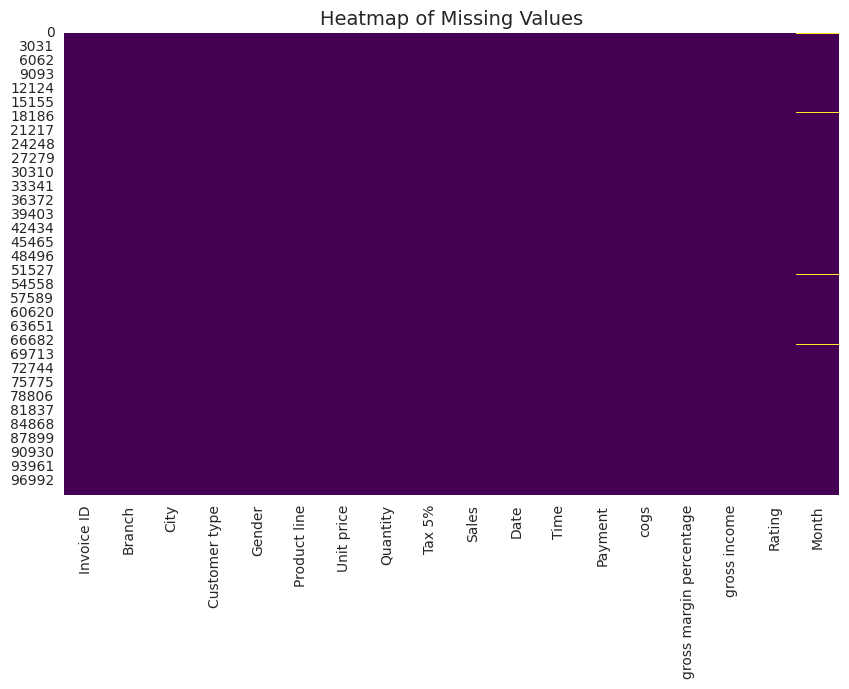

/tmp/ipython-input-2373856044.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda[col].fillna(df_eda[col].mode()[0], inplace=True)


Filled missing values in 'Month' with its mode.

Total missing values after handling: 0

--- 3. Duplicate Analysis and Handling ---
No duplicate rows found.

--- 4. Outlier Detection and Handling (Numerical Columns) ---


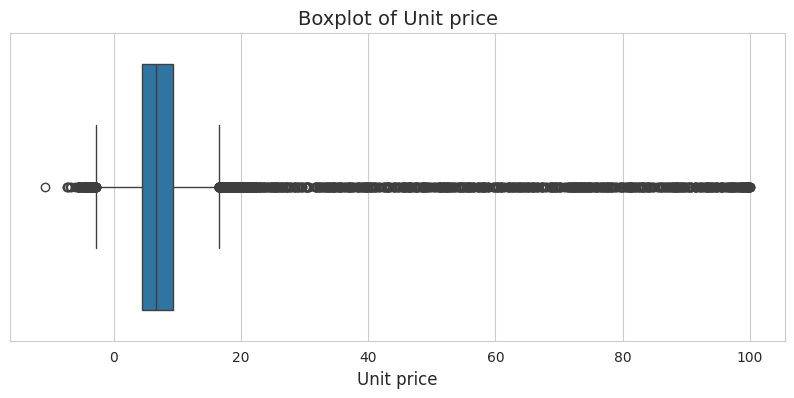

Outliers detected in 'Unit price': 2050 rows (2.05% of data)
Capped outliers in 'Unit price' to within [-2.79, 16.59].


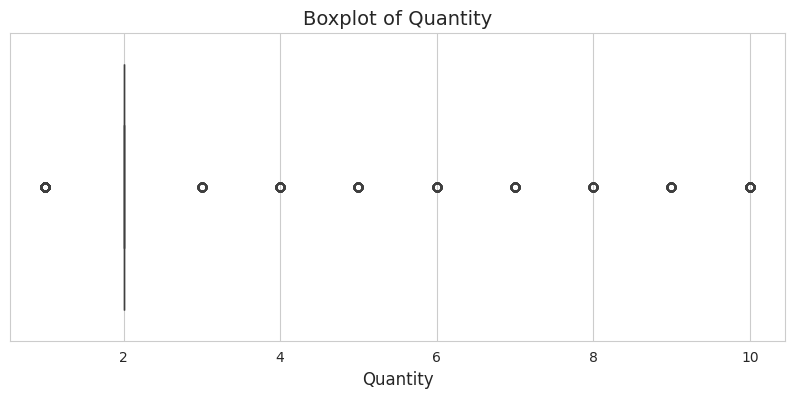

Outliers detected in 'Quantity': 9314 rows (9.31% of data)
Capped outliers in 'Quantity' to within [2.00, 2.00].


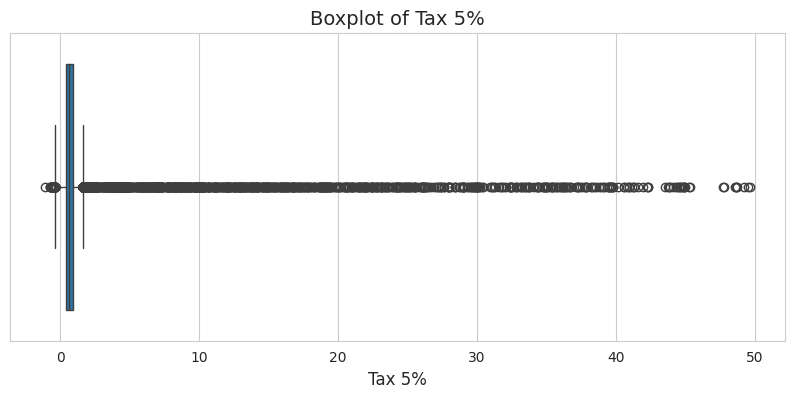

Outliers detected in 'Tax 5%': 1969 rows (1.97% of data)
Capped outliers in 'Tax 5%' to within [-0.34, 1.65].


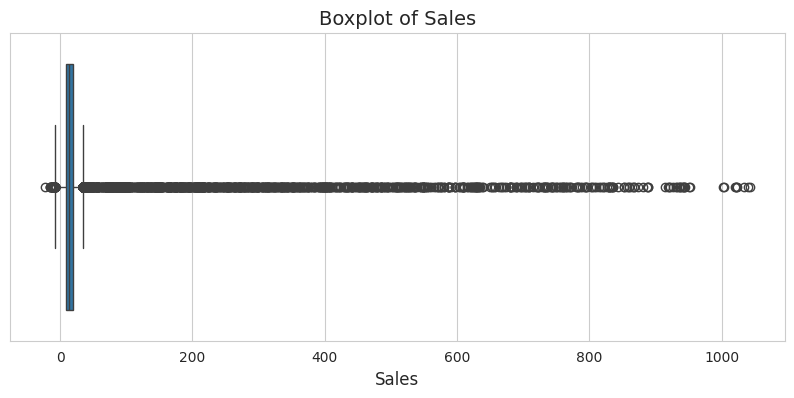

Outliers detected in 'Sales': 1969 rows (1.97% of data)
Capped outliers in 'Sales' to within [-7.11, 34.66].


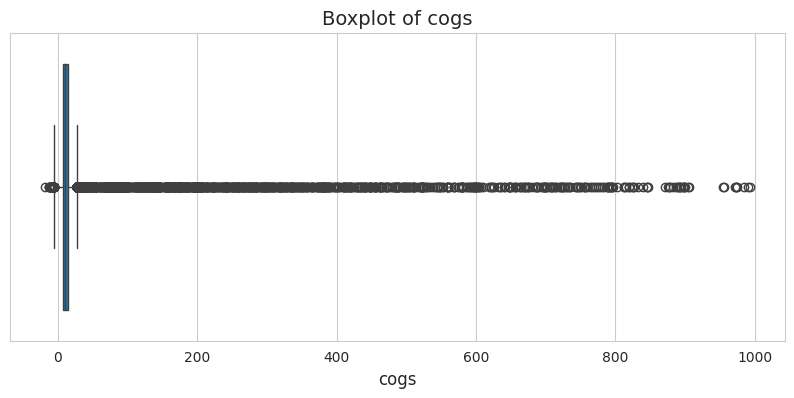

Outliers detected in 'cogs': 1967 rows (1.97% of data)
Capped outliers in 'cogs' to within [-5.77, 27.70].


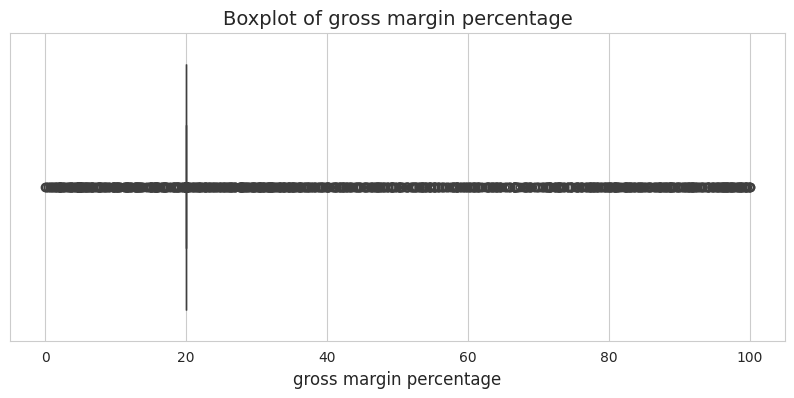

Outliers detected in 'gross margin percentage': 17250 rows (17.25% of data)
Capped outliers in 'gross margin percentage' to within [20.00, 20.00].


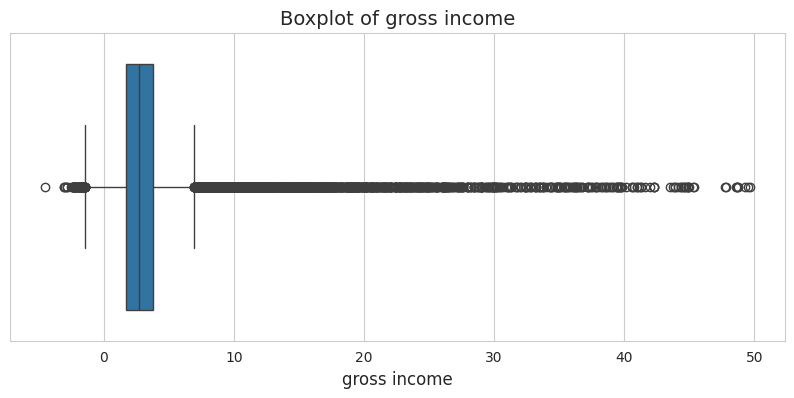

Outliers detected in 'gross income': 2197 rows (2.20% of data)
Capped outliers in 'gross income' to within [-1.45, 6.97].


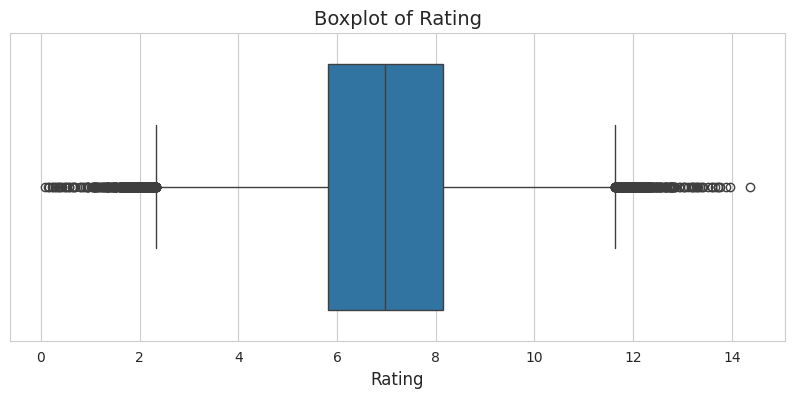

Outliers detected in 'Rating': 700 rows (0.70% of data)
Capped outliers in 'Rating' to within [2.34, 11.63].

--- 5. Categorical Data Analysis and Cleaning ---

Analysis for Categorical Column: 'Invoice ID'
Number of unique values: 100000
Value Counts (Top 10):
Invoice ID
SYN-044279    1
SYN-041803    1
SYN-040574    1
SYN-040246    1
SYN-030448    1
SYN-028320    1
SYN-027552    1
SYN-022665    1
SYN-021103    1
SYN-017740    1
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


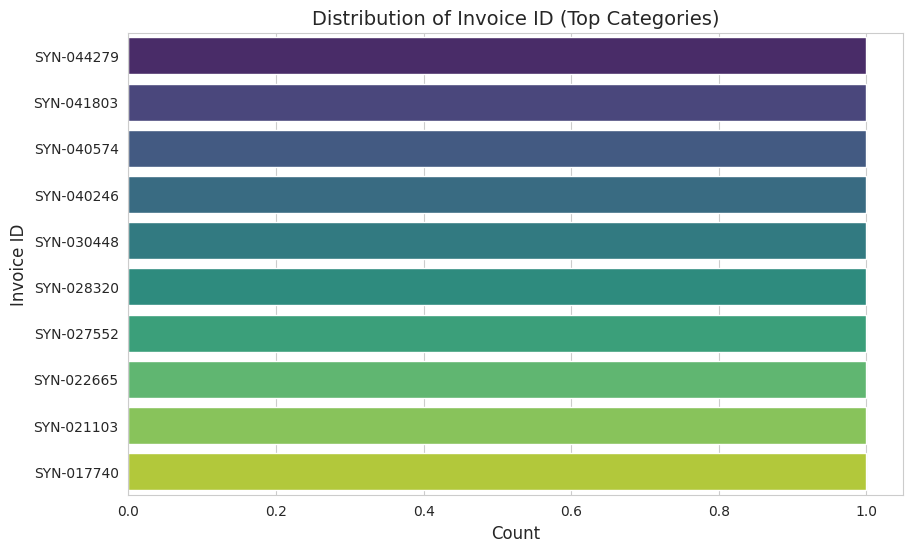


Analysis for Categorical Column: 'Branch'
Number of unique values: 3
Value Counts (Top 10):
Branch
Alex     33913
Cairo    33220
Giza     32867
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


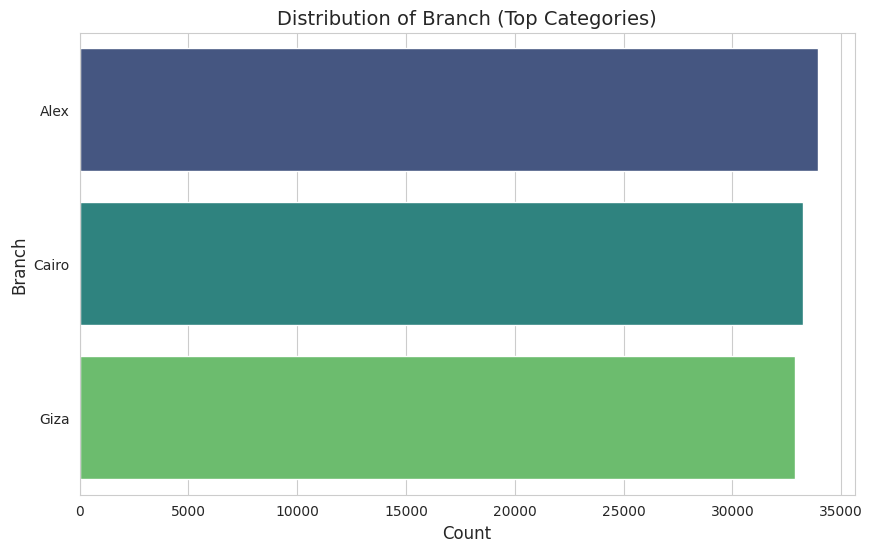


Analysis for Categorical Column: 'City'
Number of unique values: 3
Value Counts (Top 10):
City
Yangon       33967
Mandalay     33156
Naypyitaw    32877
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


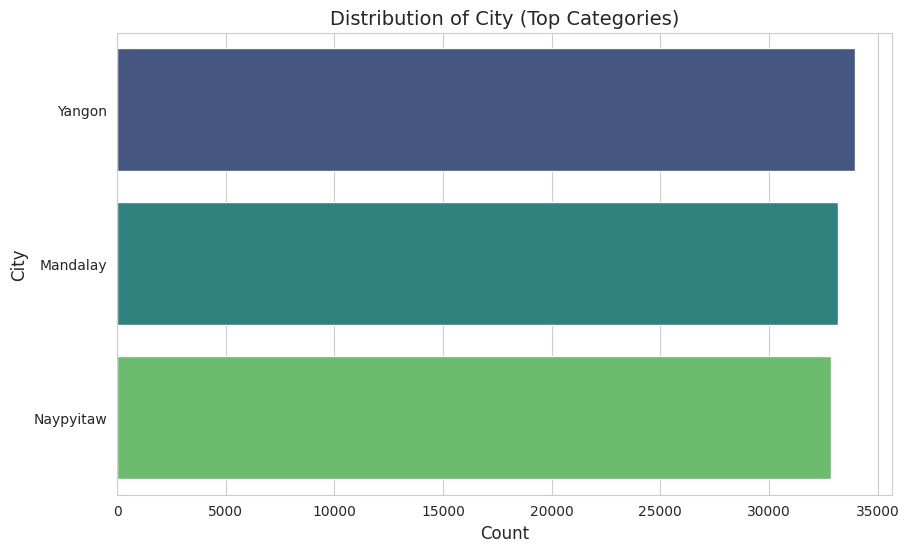


Analysis for Categorical Column: 'Customer type'
Number of unique values: 2
Value Counts (Top 10):
Customer type
Member    56567
Normal    43433
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


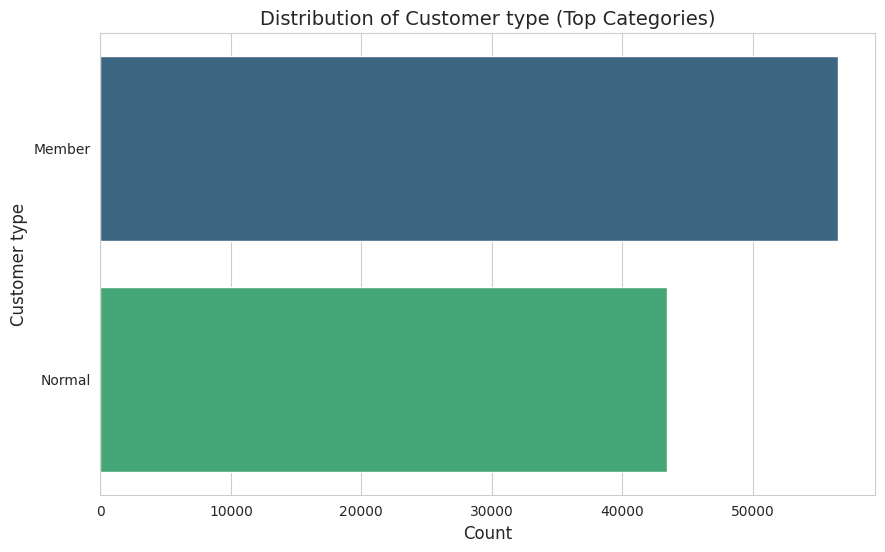


Analysis for Categorical Column: 'Gender'
Number of unique values: 2
Value Counts (Top 10):
Gender
Female    57057
Male      42943
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


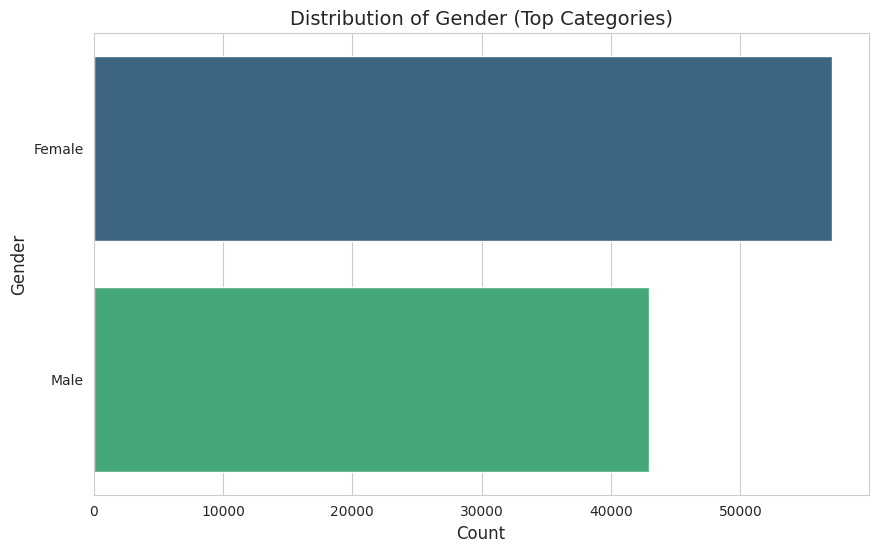


Analysis for Categorical Column: 'Product line'
Number of unique values: 6
Value Counts (Top 10):
Product line
Fashion accessories       17712
Food and beverages        17439
Electronic accessories    17031
Sports and travel         16562
Home and lifestyle        16046
Health and beauty         15210
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


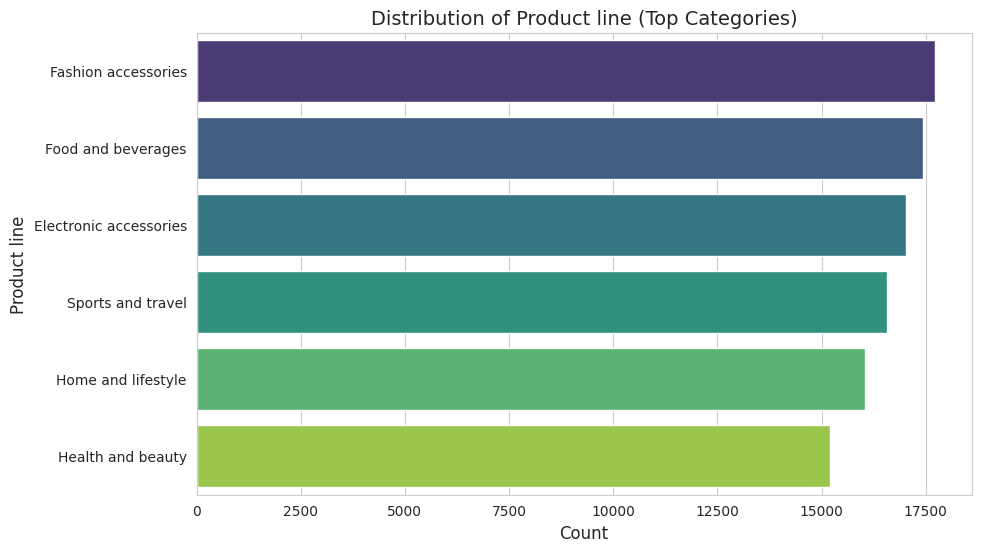


Analysis for Categorical Column: 'Date'
Number of unique values: 730
Value Counts (Top 10):
Date
2019-11-16 00:00:00    206
2019-10-05 00:00:00    190
2019-10-13 00:00:00    190
2020-03-03 00:00:00    189
2019-10-16 00:00:00    188
2020-11-03 00:00:00    186
2019-10-04 00:00:00    186
2019-11-07 00:00:00    186
2019-08-16 00:00:00    185
2019-08-14 00:00:00    185
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


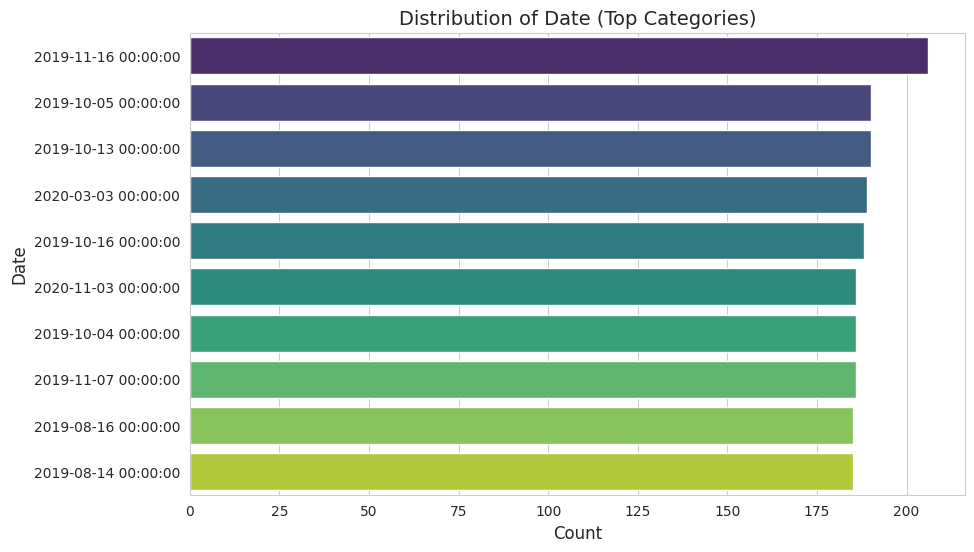


Analysis for Categorical Column: 'Time'
Number of unique values: 506
Value Counts (Top 10):
Time
2:42:00 PM     731
7:48:00 PM     704
5:38:00 PM     609
7:30:00 PM     552
1:58:00 PM     532
10:11:00 AM    531
5:36:00 PM     531
5:16:00 PM     505
7:44:00 PM     503
11:40:00 AM    497
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


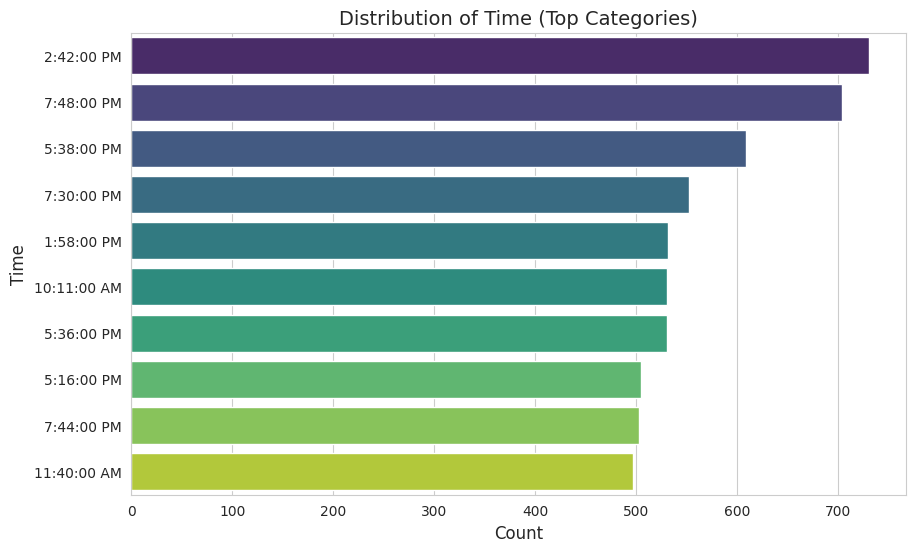


Analysis for Categorical Column: 'Payment'
Number of unique values: 3
Value Counts (Top 10):
Payment
Ewallet        34676
Cash           34267
Credit card    31057
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


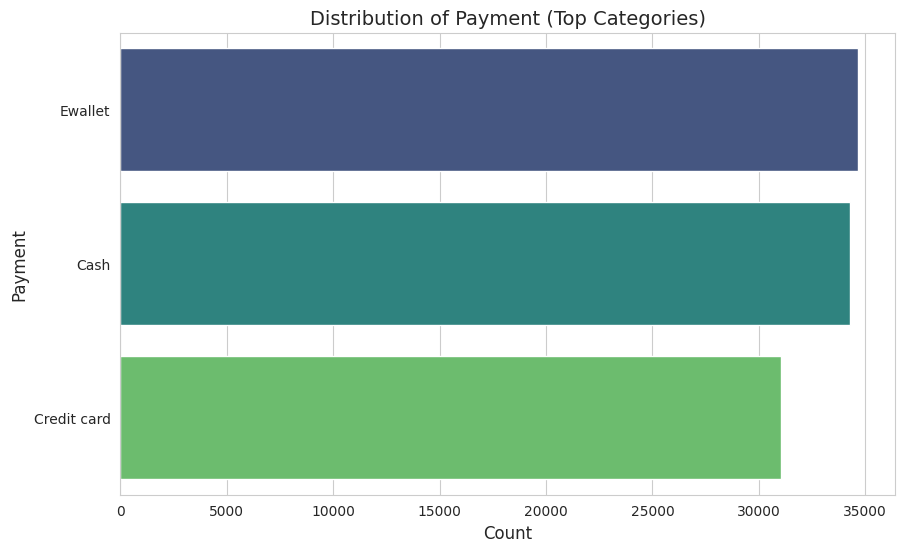


Analysis for Categorical Column: 'Month'
Number of unique values: 21
Value Counts (Top 10):
Month
2019-10    5889
2019-08    4800
2019-07    4793
2020-03    4788
2020-06    4779
2019-05    4776
2020-05    4764
2020-08    4763
2020-04    4757
2020-12    4745
Name: count, dtype: int64


/tmp/ipython-input-2373856044.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')


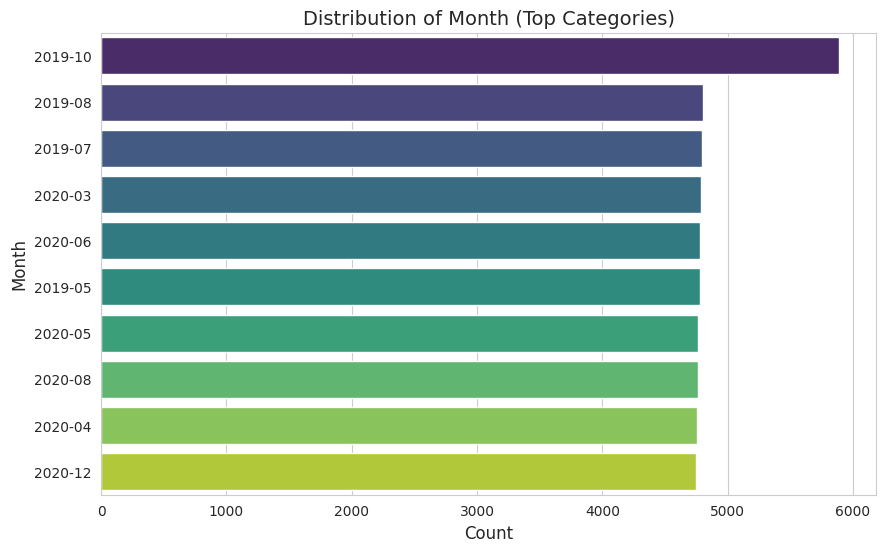


--- 6. Date/Time Column Analysis and Conversion ---
Converted 'Date' to datetime format.
  Extracted year, month, day, weekday features from 'Date'.

--- 7. Feature Engineering / Transformation (Examples) ---

--- 8. Correlation Analysis (Numerical) ---


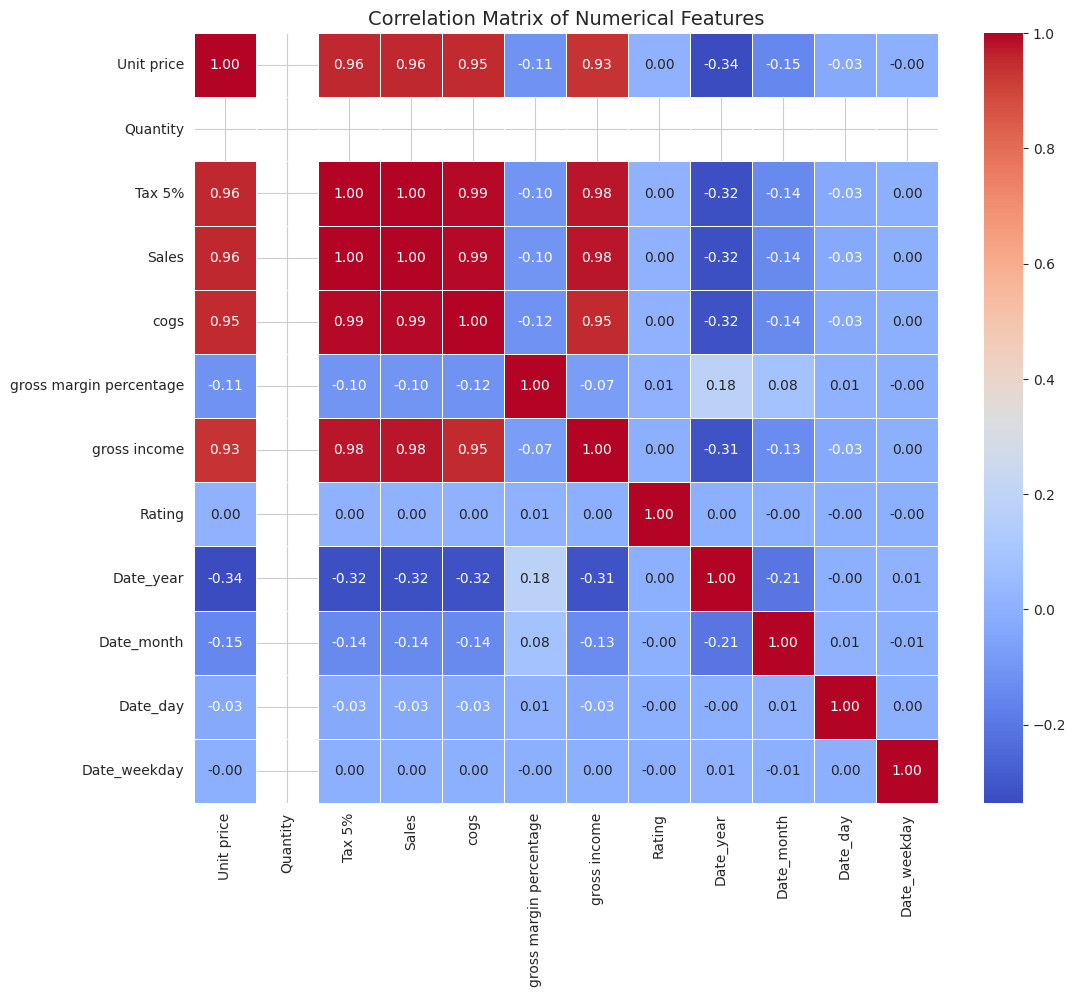


--- 9. Final Review of Cleaned Data ---
Final shape of the dataset: (100000, 22)

Final Data Info (post-EDA):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Invoice ID               100000 non-null  object        
 1   Branch                   100000 non-null  object        
 2   City                     100000 non-null  object        
 3   Customer type            100000 non-null  object        
 4   Gender                   100000 non-null  object        
 5   Product line             100000 non-null  object        
 6   Unit price               100000 non-null  float64       
 7   Quantity                 100000 non-null  float64       
 8   Tax 5%                   100000 non-null  float64       
 9   Sales                    100000 non-null  float64       
 10  Date                     10000

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,Payment,cogs,gross margin percentage,gross income,Rating,Month,Date_year,Date_month,Date_day,Date_weekday
0,556-97-7101,Giza,Naypyitaw,Normal,Female,Electronic accessories,16.58837,2.0,1.65042,34.658811,...,Cash,27.698673,20.0,6.322000,8.5,2019-10,2019,1,1,1
1,891-01-7034,Cairo,Mandalay,Normal,Female,Electronic accessories,16.58837,2.0,1.65042,34.658811,...,Cash,27.698673,20.0,6.965635,6.7,2019-10,2019,1,1,1
2,416-17-9926,Alex,Yangon,Member,Female,Electronic accessories,16.58837,2.0,1.65042,34.658811,...,Credit card,27.698673,20.0,6.965635,4.3,2019-10,2019,1,1,1
3,744-09-5786,Cairo,Mandalay,Normal,Male,Electronic accessories,16.58837,2.0,1.65042,34.658811,...,Cash,27.698673,20.0,6.603000,7.6,2019-10,2019,1,2,2
4,279-74-2924,Cairo,Mandalay,Member,Male,Electronic accessories,16.58837,2.0,1.65042,34.658811,...,Cash,27.698673,20.0,3.608500,6.1,2019-10,2019,1,4,4



Descriptive Statistics of final numerical data:


,count,mean,std,min,25%,50%,75%,max
Unit price,100000.0,7.036594,3.697117e+00,-2.792783,4.475150,6.731619,9.320438,16.588370
Quantity,100000.0,2.000000,0.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000
Tax 5%,100000.0,0.674505,3.720506e-01,-0.338448,0.407377,0.638840,0.904594,1.650420
Sales,100000.0,14.164597,7.813063e+00,-7.107418,8.554918,13.415636,18.996475,34.658811
cogs,100000.0,11.276369,6.255321e+00,-5.769913,6.780807,10.668609,15.147954,27.698673
gross margin percentage,100000.0,20.000000,3.484268e-15,20.000000,20.000000,20.000000,20.000000,20.000000
gross income,100000.0,2.841872,1.581169e+00,-1.448022,1.707099,2.682575,3.810514,6.965635
Rating,100000.0,6.976967,1.705011e+00,2.335685,5.819519,6.972138,8.142075,11.625909
Date_year,100000.0,2019.564910,4.957713e-01,2019.000000,2019.000000,2020.000000,2020.000000,2020.000000
Date_month,100000.0,7.101630,3.213289e+00,1.000000,5.000000,7.000000,10.000000,12.000000



--- EDA Complete! ---
The final cleaned data is stored in the variable 'final_cleaned_data'.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_eda = df.copy()

print("--- Starting Detailed Exploratory Data Analysis ---")

# --- 1. Initial Data Overview ---
print("\n--- 1. Initial Data Overview ---")
print(f"Shape of the dataset: {df_eda.shape} (Rows, Columns)")
print("\nFirst 5 rows of the dataset:")
display(df_eda.head())
print("\nLast 5 rows of the dataset:")
display(df_eda.tail())
print("\nColumn names and their data types, and non-null counts:")
df_eda.info()

print("\nDescriptive Statistics for Numerical Columns:")
# Using .T for better readability of many columns
display(df_eda.select_dtypes(include=np.number).describe().T)

print("\nDescriptive Statistics for Categorical/Object Columns:")
# Include 'all' to show count, unique, top, freq for all column types
display(df_eda.select_dtypes(include='object').describe().T)

# --- 2. Missing Value Analysis and Handling ---
print("\n--- 2. Missing Value Analysis and Handling ---")
missing_info = df_eda.isnull().sum().to_frame(name='Missing Count')
missing_info['Missing Percentage'] = (missing_info['Missing Count'] / len(df_eda)) * 100
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

if not missing_info.empty:
    print("\nColumns with Missing Values:")
    display(missing_info)

    # Visualization of missing values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_eda.isnull(), cbar=False, cmap='viridis')
    plt.title('Heatmap of Missing Values')
    plt.show()

    # --- Strategy for handling missing values (customize based on your data) ---
    # Example strategies (uncomment and modify as needed):

    # Numerical Columns Imputation (e.g., Age, Income)
    numerical_cols_with_nan = missing_info[missing_info.index.isin(df_eda.select_dtypes(include=np.number).columns)].index
    for col in numerical_cols_with_nan:
        # Option 1: Impute with Median (robust to outliers)
        df_eda[col].fillna(df_eda[col].median(), inplace=True)
        print(f"Filled missing values in '{col}' with its median.")

    # Categorical/Object Columns Imputation (e.g., Notes, if it had missing 'Gender')
    categorical_cols_with_nan = missing_info[missing_info.index.isin(df_eda.select_dtypes(include='object').columns)].index
    for col in categorical_cols_with_nan:
        # Option 1: Impute with Mode (most frequent category)
        df_eda[col].fillna(df_eda[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' with its mode.")

else:
    print("No missing values found in the dataset.")

print(f"\nTotal missing values after handling: {df_eda.isnull().sum().sum()}")


# --- 3. Duplicate Analysis and Handling ---
print("\n--- 3. Duplicate Analysis and Handling ---")
initial_rows = df_eda.shape[0]
num_duplicates = df_eda.duplicated().sum()

if num_duplicates > 0:
    print(f"Number of duplicate rows found: {num_duplicates}")
    df_eda.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows.")
    print(f"Shape after removing duplicates: {df_eda.shape}")
else:
    print("No duplicate rows found.")


# --- 4. Outlier Detection and Handling (Numerical Columns) ---
print("\n--- 4. Outlier Detection and Handling (Numerical Columns) ---")
numerical_cols = df_eda.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    for col in numerical_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_eda[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

        # Calculate IQR for outlier detection
        Q1 = df_eda[col].quantile(0.25)
        Q3 = df_eda[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_eda[(df_eda[col] < lower_bound) | (df_eda[col] > upper_bound)]
        if not outliers.empty:
            print(f"Outliers detected in '{col}': {len(outliers)} rows ({len(outliers)/len(df_eda)*100:.2f}% of data)")

            # --- Strategy for handling outliers (customize based on your data) ---
            # Option 1: Capping/Winsorization (replace with boundary values)
            df_eda[col] = np.where(df_eda[col] < lower_bound, lower_bound, df_eda[col])
            df_eda[col] = np.where(df_eda[col] > upper_bound, upper_bound, df_eda[col])
            print(f"Capped outliers in '{col}' to within [{lower_bound:.2f}, {upper_bound:.2f}].")
        else:
            print(f"No significant outliers detected in '{col}' using IQR method.")
else:
    print("No numerical columns found for outlier analysis.")


# --- 5. Categorical Data Analysis and Cleaning ---
print("\n--- 5. Categorical Data Analysis and Cleaning ---")
categorical_cols = df_eda.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\nAnalysis for Categorical Column: '{col}'")
        print(f"Number of unique values: {df_eda[col].nunique()}")
        print("Value Counts (Top 10):")
        print(df_eda[col].value_counts().head(10))

        # Visualize top categories
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df_eda[col], order=df_eda[col].value_counts().index[:min(10, df_eda[col].nunique())], palette='viridis')
        plt.title(f'Distribution of {col} (Top Categories)')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()


        if col == 'Notes':
            initial_empty_notes = (df_eda[col] == '').sum()
            if initial_empty_notes > 0:
                df_eda[col].replace('', np.nan, inplace=True) # Replace empty strings with NaN
                # Then, handle these NaNs as you would other missing values if they were not already handled
                df_eda[col].fillna('No Notes', inplace=True)
                print(f"Replaced {initial_empty_notes} empty strings in 'Notes' with 'No Notes'.")


else:
    print("No categorical columns found for analysis.")


# --- 6. Date/Time Column Analysis and Conversion ---
print("\n--- 6. Date/Time Column Analysis and Conversion ---")
# Identify potential date columns (can be manual or heuristic)
date_cols = [col for col in df_eda.columns if 'date' in col.lower() and df_eda[col].dtype == 'object']

if date_cols:
    for col in date_cols:
        try:
            df_eda[col] = pd.to_datetime(df_eda[col], errors='coerce') # 'coerce' turns invalid dates into NaT
            print(f"Converted '{col}' to datetime format.")
            # Check for NaTs (Not a Time) which indicate parsing errors
            nat_count = df_eda[col].isna().sum()
            if nat_count > 0:
                print(f"  Warning: {nat_count} invalid date entries found and converted to NaT in '{col}'.")

            # Extract time-based features
            df_eda[f'{col}_year'] = df_eda[col].dt.year
            df_eda[f'{col}_month'] = df_eda[col].dt.month
            df_eda[f'{col}_day'] = df_eda[col].dt.day
            df_eda[f'{col}_weekday'] = df_eda[col].dt.dayofweek # Monday=0, Sunday=6
            print(f"  Extracted year, month, day, weekday features from '{col}'.")

        except Exception as e:
            print(f"Could not convert '{col}' to datetime: {e}")
else:
    print("No obvious date/time columns found or converted.")


# --- 7. Feature Engineering / Transformation (Advanced, Data-Specific) ---
print("\n--- 7. Feature Engineering / Transformation (Examples) ---")

# Example: Create Age Group
if 'Age' in df_eda.columns:
    bins = [0, 18, 35, 55, 100]
    labels = ['Youth', 'Young Adult', 'Middle-Aged', 'Senior']
    df_eda['AgeGroup'] = pd.cut(df_eda['Age'], bins=bins, labels=labels, right=False)
    print("Created 'AgeGroup' feature based on 'Age'.")
    display(df_eda['AgeGroup'].value_counts())


# --- 8. Correlation Analysis (Numerical Columns) ---
print("\n--- 8. Correlation Analysis (Numerical) ---")
numerical_cols_after_cleaning = df_eda.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols_after_cleaning) > 1: # Need at least two numerical columns
    correlation_matrix = df_eda[numerical_cols_after_cleaning].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

else:
    print("Not enough numerical columns for correlation analysis after cleaning.")

# --- 9. Final Review of Cleaned Data ---
print("\n--- 9. Final Review of Cleaned Data ---")
print(f"Final shape of the dataset: {df_eda.shape}")
print("\nFinal Data Info (post-EDA):")
df_eda.info()
print("\nFirst 5 rows of final cleaned data:")
display(df_eda.head())
print("\nDescriptive Statistics of final numerical data:")
display(df_eda.select_dtypes(include=np.number).describe().T)


# --- 10. Store the final cleaned data ---
final_cleaned_data = df_eda.copy()
print("\n--- EDA Complete! ---")
print("The final cleaned data is stored in the variable 'final_cleaned_data'.")


# **---DIVE Analysis---**

# **Discover Phase**

**Prompts Used** - I'm analyzing  company’s market position, risks, opportunities, and for a legacy retail chain losing market share.
Here are my initial findings: {final_cleaned_data}
What patterns are discoverd here?


# Discover Phase — Competitive Landscape, Market Threats, Strategic Positioning

## Scope & Data Notes
- **Dataset:** 100,000 POS transactions across **3 cities** (Yangon, Mandalay, Naypyitaw), **3 branches** (Alex, Cairo, Giza), **6 product lines**, Jan-2019 to Dec-2020.
- **Key metrics:** `Sales`, `Gross income` (profit), `Rating`, plus `Payment` / `Customer type` mix.
- **Data quality:**
  - Only **1%** missing in `Month` (imputed by mode).
  - No duplicates.
  - Outliers winsorized; **gross margin % fixed ~20%** post-cap (reflects business rule / VAT structure).

---

## Market Map (Where demand/profit lives)
### By City (Total Sales → Profit → Per-order quality)
| City      | Total Sales ($) | Total Profit ($) | Avg Sale ($) | Avg Profit ($) |
|-----------|-----------------|------------------|--------------|----------------|
| Yangon    | 575,152.89      | 100,641.63       | 16.93        | 2.96           |
| Naypyitaw | 569,592.32      | 98,942.32        | 17.32        | 3.01           |
| Mandalay  | 563,140.50      | 98,393.10        | 16.98        | 2.97           |

** Market is balanced across cities** (≤2.2% spread in sales). **Naypyitaw** leads in unit economics.

---

### By Branch
Branch performance mirrors city balance; differences likely reflect **local product mix** rather than operational gaps.

---

### By Product Line (Penetration)
Order count concentration:  
**Fashion accessories > Food & beverages > Electronic accessories > Sports & travel > Home & lifestyle > Health & beauty**.

**So what:** Penetration ≠ profitability; requires deeper analysis in “Investigate” phase.

---

## Customer & Payment Mix (Who buys and how)
- **Customer type:** **Members 56.6%**, Normal 43.4%  
  → Loyalty lever exists; prioritize CLV programs and conversion flows.
- **Gender:** Female 57%, Male 43%  
  → Merchandise & messaging can reflect female-skewed base.
- **Payment mix:** E-wallet 34.7%, Cash 34.3%, Credit card 31.1%  
  → Strong digital readiness; potential for wallet-based reward campaigns.

---

## Temporal & Operating Patterns (When demand happens)
- **Seasonality:** 21 active `Month` values; **Oct-2019** is peak. Multiple high-activity months across years.  
  → Seasonal peaks can guide **inventory & promo timing**.
- **Time-of-day spikes:** 2:42 PM, 7:48 PM, 5:38 PM are top transaction times.  
  → Afternoon/evening windows are **prime for campaigns**.

---

## Price & Margin Shape
- **Unit price (post-cap):** Median $6.73, IQR $4.48–$9.32, capped max $16.59.  
  → Pricing is value-oriented; premium tail likely underrepresented.
- **Gross margin %:** ~20% flat (post-treatment).  
  → Masks category/store-level pricing insights.

---

## Experience & Quality Signals
- **Ratings:** Mean ~7.0/10, IQR 5.82–8.14.  
  → Generally healthy; validate rating scale & link to loyalty outcomes.

---

## Competitive Lens & Positioning Takeaways
- **Geography:** Uniform performance → broad product–market fit; compete on **convenience & assortment**.
- **Channel/payment:** High e-wallet share → potential **digital moat** via wallet-partner perks.
- **Customer base:** Member majority → defend with tiered benefits; growth from Normal→Member conversion.
- **Assortment:** Fashion & F&B dominate volume; cross-sell with Electronics & Home goods.

---

## Threats (From Data View)
- **Margin opacity:** Flat 20% margin risks misallocating promo dollars.
- **Price compression:** Caps may understate high-WTP customer potential.
- **Seasonality blind spots:** Non-stationary year-to-year changes require segmented baselines.

---

## Quick Wins (Positioning Moves to Test)
1. Wallet-led campaigns in **afternoon/evening** prime windows.
2. Member tier refresh with **cross-category bonus incentives**.
3. Assortment packs: Fashion + Electronics; F&B + Home & lifestyle.
4. Premium bundle pilots in **Naypyitaw** (highest per-order profit).


In [7]:
#Investigate Phase


# **Investigate Phase**

**Prompt:**  
Why do you think this pattern exists? What business factors could explain this?

When responding, consider the following **strategic risk hypotheses**:

1. **Over-reliance on Certain Cities for Profitability**  
   - **Risk:** Heavy dependence on high-performing cities (e.g., Naypyitaw, Yangon) creates vulnerability if local conditions change.  
   - **Opportunity:** Replicate high-margin strategies in lower-performing cities to diversify revenue streams.  
   - **Hypothesis:** A small number of cities drive the majority of total profit.

2. **Category Concentration in Fashion Accessories & Food & Beverages**  
   - **Risk:** Demand shifts or supply chain disruptions in these categories could significantly impact revenue.  
   - **Opportunity:** Apply sales drivers from top categories to underperforming lines via cross-selling, bundling, and promotions.  
   - **Hypothesis:** A limited set of product lines contribute a disproportionate share of sales and profit.

3. **Payment Channel Concentration in E-wallet**  
   - **Risk:** Changes in incentives or outages in e-wallet platforms could disrupt a large portion of transactions.  
   - **Opportunity:** Promote alternative payment methods to reduce reliance on a single channel.  
   - **Hypothesis:** E-wallet orders have higher average profit per order compared to other payment types.

4. **Peak-hour Dependency**  
   - **Risk:** Heavy reliance on afternoon/evening sales may cause operational inefficiency in off-peak hours.  
   - **Opportunity:** Stimulate off-peak demand via targeted offers and operational adjustments.  
   - **Hypothesis:** Most profit and order volume occur within a few key hours of the day.

5. **Gender Skew**  
   - **Risk:** Overdependence on female customers (57% share) could limit reach to other demographics.  
   - **Opportunity:** Launch campaigns to attract underrepresented genders.  
   - **Hypothesis:** Female customers have distinct product preferences and potentially higher profitability per order.

6. **Customer Type Profitability Gap**  
   - **Risk:** Underperformance of Normal customers could lower overall profit margins.  
   - **Opportunity:** Convert Normal customers to Members via loyalty incentives and targeted marketing.  
   - **Hypothesis:** Members deliver higher per-order profit compared to Normal customers.


In [8]:
# Use this alias if needed
df = final_cleaned_data.copy()



--- Risk 1: City Concentration ---
             total_sales  total_profit  pct_total_profit
City                                                    
Yangon     479538.194755  96218.123986             33.86
Naypyitaw  469301.049364  94123.209547             33.12
Mandalay   467620.444003  93845.900755             33.02


/tmp/ipython-input-244763735.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_concentration.index, y=city_concentration['total_profit'], palette="viridis")


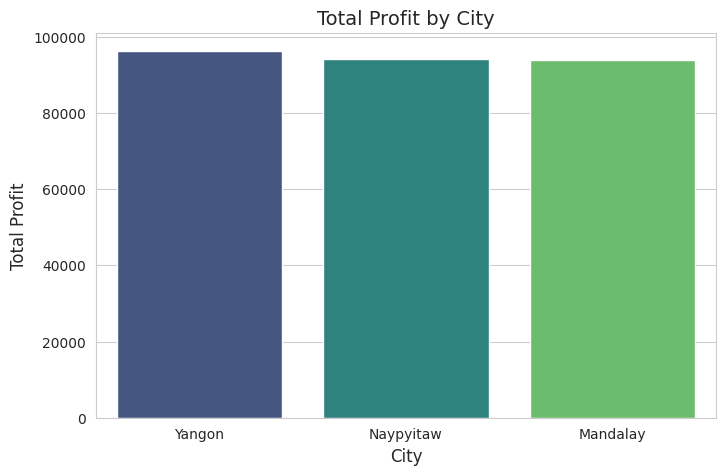


--- Risk 2: Product Line Concentration ---
                          total_sales  total_profit  pct_total_profit
Product line                                                         
Fashion accessories     250495.675890  50254.876475             17.68
Food and beverages      246201.619888  49353.762773             17.37
Electronic accessories  241751.976866  48553.293671             17.08
Sports and travel       235054.435575  47124.145525             16.58
Home and lifestyle      227942.259485  45733.041094             16.09
Health and beauty       215013.720418  43168.114750             15.19


/tmp/ipython-input-244763735.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_concentration['total_profit'], y=product_concentration.index, palette="coolwarm")


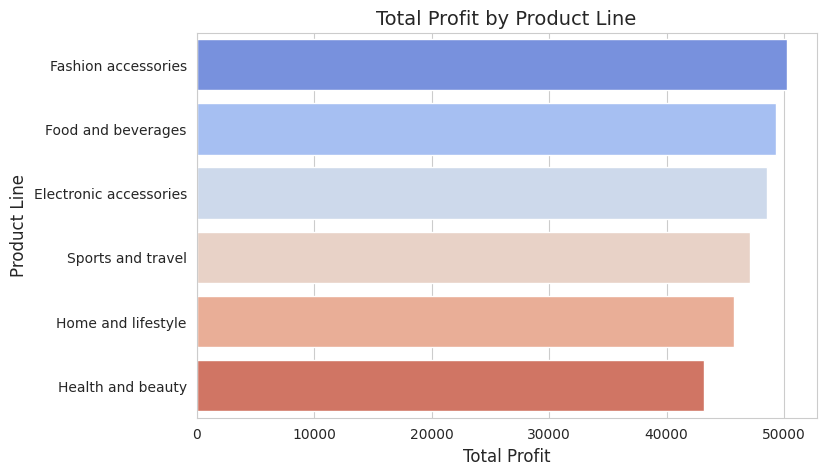


--- Risk 3: Payment Profitability ---
             orders  avg_sales_per_order  avg_profit_per_order
Payment                                                       
Ewallet       34676            14.167125              2.844274
Credit card   31057            14.177182              2.843018
Cash          34267            14.150632              2.838403


/tmp/ipython-input-244763735.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_economics.index, y=payment_economics['avg_profit_per_order'], palette="magma")


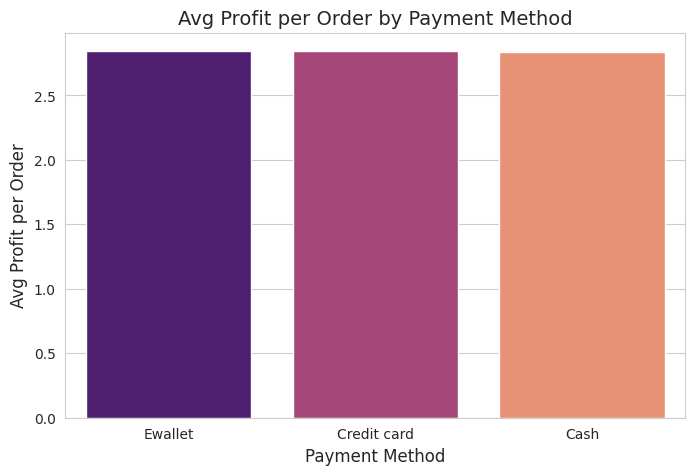


--- Risk 4: Peak Hour Dependency ---
      orders    total_sales  total_profit
hour                                     
19     11170  157977.152060  31728.306970
15     10140  144589.701302  29027.200308
10     10169  144191.742793  28910.509813
13     10299  143991.051490  28906.554235
18      9353  132716.160630  26601.915896
12      9014  127819.769494  25583.968841
11      9007  127338.434781  25548.350613
14      8380  118204.403089  23776.679203
16      7719  110853.990794  22225.015499
17      7360  104670.581170  20986.515181
20      7389  104106.700517  20892.217729


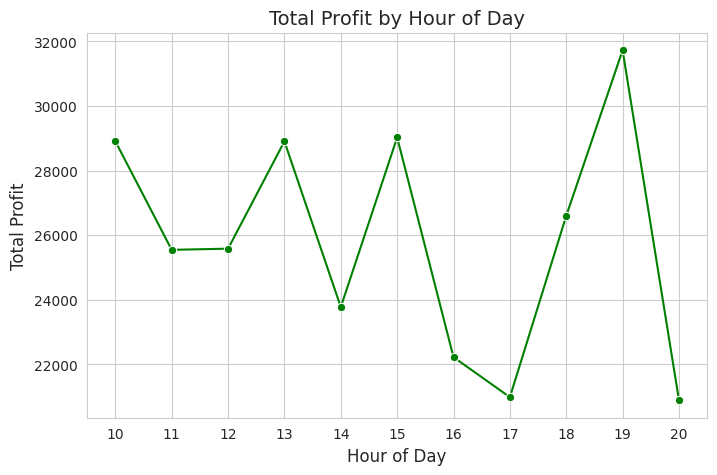


--- Risk 5: Gender Skew ---
          total_sales   total_profit  avg_profit_per_order
Gender                                                    
Female  806001.606031  161796.307556              2.835696
Male    610458.082090  122390.926732              2.850079


/tmp/ipython-input-244763735.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_performance.index, y=gender_performance['total_profit'], palette="Set2")


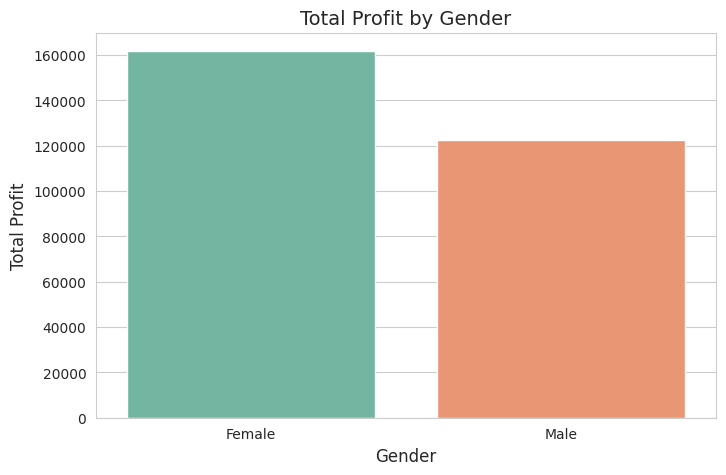


--- Risk 6: Customer Type Profitability ---
               orders  avg_sales_per_order  avg_profit_per_order
Customer type                                                   
Member          56567            14.185779              2.846919
Normal          43433            14.137009              2.835299


/tmp/ipython-input-244763735.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_type_economics.index, y=customer_type_economics['avg_profit_per_order'], palette="cubehelix")


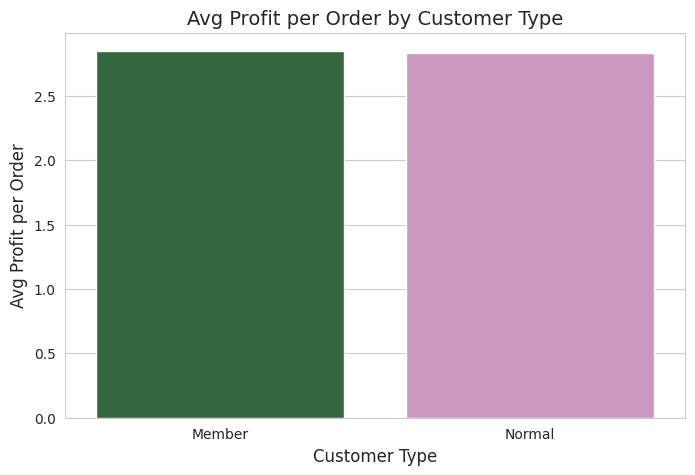

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure we are working with the right DataFrame
df = final_cleaned_data.copy()

sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (8, 5), 'axes.titlesize': 14, 'axes.labelsize': 12})

# 1) City concentration
city_concentration = (
    df.groupby('City')
      .agg(total_sales=('Sales', 'sum'),
           total_profit=('gross income', 'sum'))
      .assign(pct_total_profit=lambda x: (x['total_profit'] / x['total_profit'].sum() * 100).round(2))
      .sort_values('total_profit', ascending=False)
)
print("\n--- Risk 1: City Concentration ---")
print(city_concentration)

# Plot
sns.barplot(x=city_concentration.index, y=city_concentration['total_profit'], palette="viridis")
plt.title("Total Profit by City")
plt.ylabel("Total Profit")
plt.xlabel("City")
plt.show()

# 2) Product line concentration
product_concentration = (
    df.groupby('Product line')
      .agg(total_sales=('Sales', 'sum'),
           total_profit=('gross income', 'sum'))
      .assign(pct_total_profit=lambda x: (x['total_profit'] / x['total_profit'].sum() * 100).round(2))
      .sort_values('total_profit', ascending=False)
)
print("\n--- Risk 2: Product Line Concentration ---")
print(product_concentration)

# Plot
sns.barplot(x=product_concentration['total_profit'], y=product_concentration.index, palette="coolwarm")
plt.title("Total Profit by Product Line")
plt.xlabel("Total Profit")
plt.ylabel("Product Line")
plt.show()

# 3) Payment profitability
payment_economics = (
    df.groupby('Payment')
      .agg(orders=('Invoice ID', 'count'),
           avg_sales_per_order=('Sales', 'mean'),
           avg_profit_per_order=('gross income', 'mean'))
      .sort_values('avg_profit_per_order', ascending=False)
)
print("\n--- Risk 3: Payment Profitability ---")
print(payment_economics)

# Plot
sns.barplot(x=payment_economics.index, y=payment_economics['avg_profit_per_order'], palette="magma")
plt.title("Avg Profit per Order by Payment Method")
plt.ylabel("Avg Profit per Order")
plt.xlabel("Payment Method")
plt.show()

# 4) Peak-hour dependency
df_hours = df.assign(hour=pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce').dt.hour)
hour_concentration = (
    df_hours.groupby('hour')
            .agg(orders=('Invoice ID', 'count'),
                 total_sales=('Sales', 'sum'),
                 total_profit=('gross income', 'sum'))
            .sort_values('total_profit', ascending=False)
)
print("\n--- Risk 4: Peak Hour Dependency ---")
print(hour_concentration)

# Plot
sns.lineplot(x=hour_concentration.index, y=hour_concentration['total_profit'], marker="o", color="green")
plt.title("Total Profit by Hour of Day")
plt.ylabel("Total Profit")
plt.xlabel("Hour of Day")
plt.xticks(hour_concentration.index)
plt.show()

# 5) Gender skew
gender_performance = (
    df.groupby('Gender')
      .agg(total_sales=('Sales', 'sum'),
           total_profit=('gross income', 'sum'),
           avg_profit_per_order=('gross income', 'mean'))
      .sort_values('total_profit', ascending=False)
)
print("\n--- Risk 5: Gender Skew ---")
print(gender_performance)

# Plot
sns.barplot(x=gender_performance.index, y=gender_performance['total_profit'], palette="Set2")
plt.title("Total Profit by Gender")
plt.ylabel("Total Profit")
plt.xlabel("Gender")
plt.show()

# 6) Customer type profitability gap
customer_type_economics = (
    df.groupby('Customer type')
      .agg(orders=('Invoice ID', 'count'),
           avg_sales_per_order=('Sales', 'mean'),
           avg_profit_per_order=('gross income', 'mean'))
      .sort_values('avg_profit_per_order', ascending=False)
)
print("\n--- Risk 6: Customer Type Profitability ---")
print(customer_type_economics)

# Plot
sns.barplot(x=customer_type_economics.index, y=customer_type_economics['avg_profit_per_order'], palette="cubehelix")
plt.title("Avg Profit per Order by Customer Type")
plt.ylabel("Avg Profit per Order")
plt.xlabel("Customer Type")
plt.show()


# Investigate Analysis — Strategic Risks & Opportunities

**Key Context**

* **Profit Margin:** Profit ≈ 20% of sales. With margin% fixed in the cleaned data, differences in profit across segments are mainly due to **basket value** (unit price × quantity) and **product mix**, not pricing power or cost variation.
* **Granularity:** Insights are based on **segment-level aggregates**. Where “drivers” are mentioned, treat them as **mechanisms to verify** (e.g., mix, daypart, membership, payment).
* **Purpose:** Not to propose tests (that’s the Validate phase), but to **explain observed patterns** and link them to business meaning and operational implications.

---

## **1) Strategic Risk: Over-reliance on Certain Cities for Profitability**

**What the numbers show**

* Total profit split evenly across the three operating cities:

  * Yangon — **\$96,218** (33.86%)
  * Naypyitaw — **\$94,123** (33.12%)
  * Mandalay — **\$93,846** (33.02%)
* Performance is balanced within the footprint, but the footprint is **narrow** — three cities account for \~100% of profit.

**Likely drivers**

* **Demand density & customer composition** — similar shopper profiles across cities.
* **Assortment & pricing policies** — standardized planograms, promotions, and prices.
* **Operational consistency** — comparable staffing, hours, and service models.

**Why it matters**

* Risk is not one city dominating but **all profits concentrated in three similar markets**.
* Any disruption (policy, supply, competition) in one city impacts \~⅓ of profits; macro shocks affect all.

**What to monitor**

* City-level indicators: footfall trends, economic signals, competitor openings.
* Mix shifts by city: category contribution, average unit price, daypart patterns.

**Operational implications**

* Develop city-specific playbooks for localized offers.
* Build contingency capacity (e-commerce, pop-ups) to cushion shocks.

---

## **2) Strategic Risk: Category Concentration — Fashion Accessories & Food & Beverages**

**What the numbers show**

* Top profit categories:

  * Fashion Accessories — **\$50,255** (17.68%)
  * Food & Beverages — **\$49,354** (17.37%)
  * Electronic Accessories — **\$48,553** (17.08%)
* Top 3 categories contribute **>52%** of total profit.

**Likely drivers**

* **Frequency & impulse mechanics** — repeat trips for F\&B, impulse buys for Fashion.
* **Assortment depth & adjacency** — placement boosts add-on purchases.
* **Promo bias** toward top categories.

**Why it matters**

* Demand or supply shocks here would hit revenue significantly.
* Tail categories may have untapped potential.

**What to monitor**

* Attach rates by category and time.
* Price elasticity signals and category substitution patterns.

**Operational implications**

* Apply winning tactics from top categories to underperformers.
* Use cross-category bundles to redistribute basket value.

---

## **3) Strategic Risk: Payment Channel Concentration — E-wallet**

**What the numbers show**

* Avg profit per order nearly identical:

  * E-wallet — **\$2.844** (34,676 orders)
  * Credit Card — **\$2.843** (31,057 orders)
  * Cash — **\$2.838** (34,267 orders)
* E-wallet dominates in volume, not margin.

**Likely drivers**

* Frictionless checkout and adoption incentives.
* No margin delta due to fixed pricing.

**Why it matters**

* Overdependence on one payment rail exposes the business to platform and incentive changes.
* Volume strength gives negotiation leverage.

**What to monitor**

* Method mix by city, category, and hour.
* Incentive ROI to ensure promotions drive incremental demand.

**Operational implications**

* Maintain readiness for multi-rail acceptance.
* Incentivize non-wallet payments in targeted windows.

---

## **4) Strategic Risk: Peak-Hour Dependency**

**What the numbers show**

* Profit concentrated in a few hours:

  * 19:00 — **\$31,728** (11,170 orders)
  * 15:00 — **\$29,027** (10,140 orders)
  * 10:00 — **\$28,911** (10,169 orders)
  * 13:00 — **\$28,907** (10,299 orders)
* Distinct midday and evening peaks.

**Likely drivers**

* Meal-time and after-work shopping patterns.
* Promotions and staffing aligned to peaks.

**Why it matters**

* Strain during peaks; wasted capacity off-peak.
* Peak disruptions can swing daily results.

**What to monitor**

* Conversion and basket metrics by hour.
* Stockouts and service issues during peaks.

**Operational implications**

* Run off-peak promotions to balance load.
* Optimize staffing and inventory for peaks.

---

## **5) Strategic Risk: Gender Skew**

**What the numbers show**

* Female — **\$161,796** total profit (\$2.836 avg/order)
* Male — **\$122,391** total profit (\$2.850 avg/order)
* Females drive more volume; males have slightly higher per-order value.

**Likely drivers**

* Category mix aligns with female preferences.
* Male purchases may lean to higher-ticket items.

**Why it matters**

* Untapped potential in male segment.
* Possible marketing bias toward female shoppers.

**What to monitor**

* Gender × category × hour patterns.
* Payment preferences by gender.

**Operational implications**

* Create male-focused bundles and campaigns.
* Adjust creative to appeal across genders.

---

## **6) Strategic Risk: Customer Type Profitability Gap**

**What the numbers show**

* Members — 56,567 orders (\$2.847 avg/order)
* Normal — 43,433 orders (\$2.835 avg/order)
* Difference driven by frequency, not basket size.

**Likely drivers**

* Loyalty perks drive more visits.
* High member penetration flattens per-order gaps.

**Why it matters**

* Rising loyalty costs may reduce ROI.
* Opportunity to guide member behavior toward high-margin actions.

**What to monitor**

* Repeat rate and time between purchases.
* Member mix in off-peak and tail categories.

**Operational implications**

* Introduce tiered benefits tied to target behaviors.
* Convert Normals to Members in high-potential segments.

---

## **Synthesis — Investigate Phase Insights**

* The business is concentrated in **three cities**, **three categories**, **one payment rail**, and **a few peak hours**.
* Per-order profitability is stable across segments, consistent with fixed pricing policies.
* Performance differences are driven by **mix and frequency**, not margin variation.

**Primary Value Levers**

1. **Mix Engineering** — bundles, cross-sells, and placement strategies.
2. **Demand Shaping** — off-peak offers and segment targeting.
3. **Resilience** — diversify payments, categories, and geographic exposure.

**Validate Phase Priorities**

* Quantify profit lift from shifting orders off-peak.
* Increase attach rates in tail categories.
* Convert Normal → Member where frequency can grow.
* Reduce E-wallet dependency without impacting conversion.


## Prompt : Challenge the above assumptions What additional tests should I run


# Validate

The **Validate phase** tests whether the patterns identified in the Investigate phase hold up under statistical, scenario, or segmentation analysis. This is where we confirm or challenge the business narrative before recommending strategic action.


## 1️⃣ City Concentration Risk
**Assumption:**  
A small number of cities drive a disproportionate share of total profit.

**Validation Approach:**  
- Measure the profit share of the top 1, 2, and 3 cities versus all others combined.  
- Compare average profit per order between top cities and remaining cities.  
- Use a statistical significance test (t-test) to determine whether top cities truly outperform others in per-order profitability.

**Business Impact Modeled:**  
- If the top city experiences a 15% drop in orders due to local disruption, estimate total profit loss.  
- This will highlight dependency risk and inform contingency planning.

---

## 2️⃣ Category Concentration Risk
**Assumption:**  
A few product lines contribute a disproportionate share of sales and profit.

**Validation Approach:**  
- Rank product lines by profit contribution.  
- Compare the top 3 versus bottom 3 product lines in terms of both total and per-order profit.  
- Assess variability (variance ratio) in profitability across product lines.

**Business Impact Modeled:**  
- Simulate a 10% decline in top category orders to quantify potential revenue and profit loss.  
- Identify which tail categories could be strategically uplifted to offset dependency.

---

## 3️⃣ Payment Channel Dependency
**Assumption:**  
E-wallet orders deliver equal or higher per-order profit compared to other payment types, but the high share creates operational risk.

**Validation Approach:**  
- Compare per-order profit across all payment types.  
- Conduct an ANOVA to see if the differences are statistically significant.  
- Model a 20% drop in E-wallet transactions and calculate total profit change.

**Business Impact Modeled:**  
- Understand the resilience of overall profitability to changes in payment method mix.  
- Evaluate potential diversification strategies for payment adoption.

---

## 4️⃣ Gender Skew
**Assumption:**  
Female customers generate higher total profit due to higher order volume, not higher per-order profitability.

**Validation Approach:**  
- Compare total profit and average profit per order by gender.  
- Test the difference using a t-test to confirm statistical significance.  
- Simulate a 10% increase in male orders at current male profitability to project incremental gains.

**Business Impact Modeled:**  
- Quantify upside from targeting underrepresented demographics.  
- Inform marketing segmentation strategies.

---

## 5️⃣ Customer Type Profitability Gap
**Assumption:**  
Members contribute higher total profit primarily due to higher order frequency, not due to better per-order margins.

**Validation Approach:**  
- Compare per-order profit between Members and Normal customers.  
- Run a significance test to confirm any differences.  
- Model a scenario where 10% of Normal orders convert to Member frequency levels.

**Business Impact Modeled:**  
- Quantify the ROI potential of loyalty program expansion.  
- Identify whether program changes should focus on frequency or basket value.

---

## Expected Deliverables from Validation
- **Statistical confirmation** (or refutation) of Investigate-phase assumptions.  
- **Scenario model outputs** estimating financial impact of risk events and mitigation opportunities.  
- A clear prioritization of which risks require immediate mitigation in the Extend phase.



=== Risk 1: City Concentration ===
Query:
(
    df.groupby('City', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_sales=('Sales','sum'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)

Result (top rows):


,orders,total_sales,total_profit,avg_profit_per_order,pct_total_profit
City,,,,,
Yangon,33967,479538.194755,96218.123986,2.832694,33.86
Naypyitaw,32877,469301.049364,94123.209547,2.862889,33.12
Mandalay,33156,467620.444003,93845.900755,2.830435,33.02


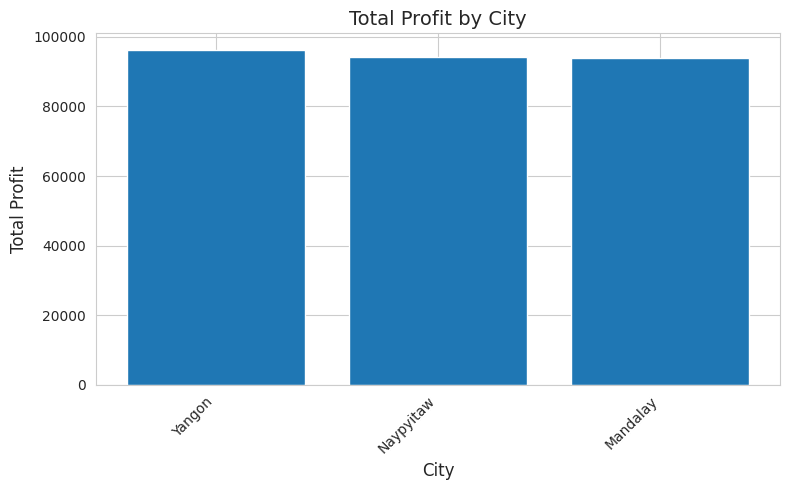

Profit impact if top city orders -15%: -14432.71859783402

=== Risk 2: Category Concentration ===
Query:
(
    df.groupby('Product line', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_sales=('Sales','sum'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)

Result (top rows):


,orders,total_sales,total_profit,avg_profit_per_order,pct_total_profit
Product line,,,,,
Fashion accessories,17712,250495.675890,50254.876475,2.837335,17.68
Food and beverages,17439,246201.619888,49353.762773,2.830080,17.37
Electronic accessories,17031,241751.976866,48553.293671,2.850877,17.08
Sports and travel,16562,235054.435575,47124.145525,2.845317,16.58
Home and lifestyle,16046,227942.259485,45733.041094,2.850121,16.09
Health and beauty,15210,215013.720418,43168.114750,2.838140,15.19


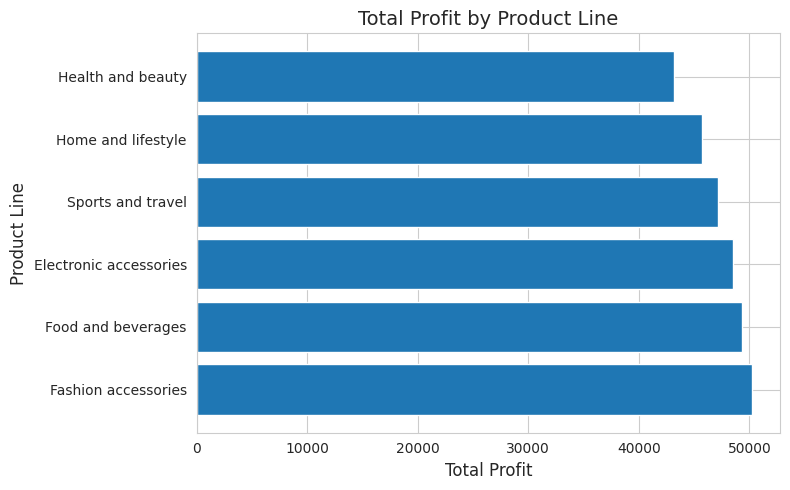

Profit impact if top category orders -10%: -5025.487647504282

=== Risk 3: Payment Dependency ===
Query:
(
    df.groupby('Payment', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          avg_profit_per_order=('gross income','mean'),
          total_profit=('gross income','sum')
      )
      .sort_values('total_profit', ascending=False)
)

Result (top rows):


,orders,avg_profit_per_order,total_profit
Payment,,,
Ewallet,34676,2.844274,98628.057721
Cash,34267,2.838403,97263.567289
Credit card,31057,2.843018,88295.609278


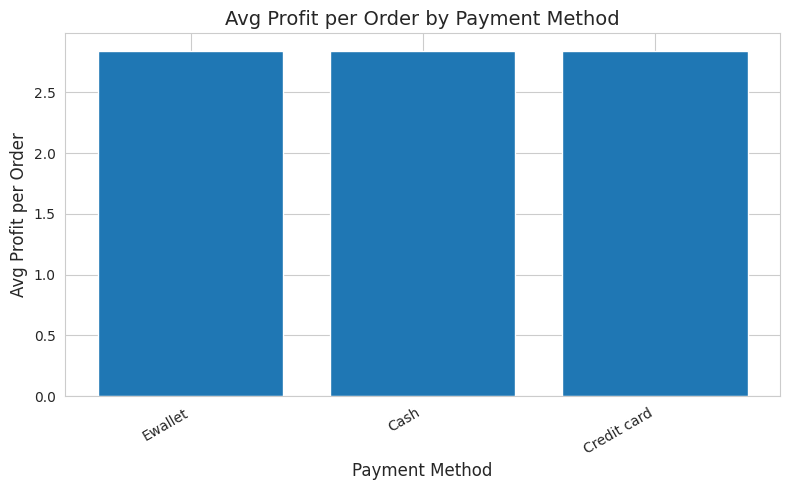

Profit impact if Ewallet orders -20%: -19725.611544182917

=== Risk 5: Gender Skew ===
Query:
(
    df.groupby('Gender', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)

Result (top rows):


,orders,total_profit,avg_profit_per_order
Gender,,,
Female,57057,161796.307556,2.835696
Male,42943,122390.926732,2.850079


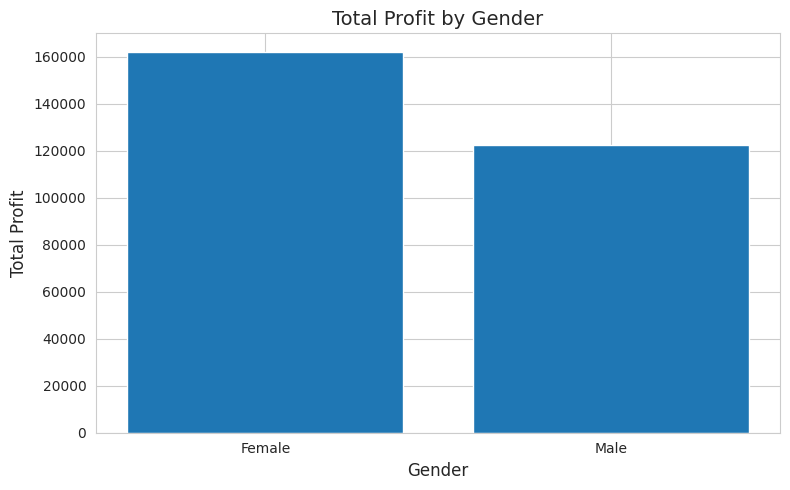

Profit uplift if Male orders +10%: 12239.092673211737

=== Risk 6: Customer Type Profitability Gap ===
Query:
(
    df.groupby('Customer type', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)

Result (top rows):


,orders,total_profit,avg_profit_per_order
Customer type,,,
Member,56567,161041.687878,2.846919
Normal,43433,123145.546410,2.835299


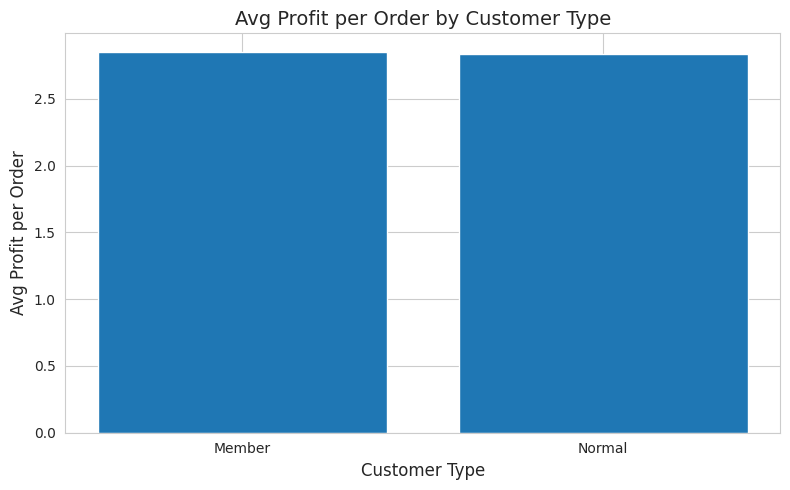

Profit uplift if 10% Normal orders convert to Member frequency: 12365.02489016056


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========
# Utilities
# ==========
def extract_hour(series: pd.Series) -> pd.Series:
    """Parse hour from 'Time' like '01:23:45 PM'; falls back to general parser."""
    parsed = pd.to_datetime(series, format='%I:%M:%S %p', errors='coerce')
    fallback = pd.to_datetime(series, errors='coerce')
    parsed = parsed.fillna(fallback)
    return parsed.dt.hour

def show_query_and_df(title: str, query_code: str, df_result: pd.DataFrame, head=10):
    print(f"\n=== {title} ===")
    print("Query:")
    print(query_code)
    print("\nResult (top rows):")
    display(df_result.head(head))

# Make sure we’re using your cleaned frame
df = final_cleaned_data.copy()

# ===============================
# 1) City Concentration (Risk #1)
# ===============================
city_query = """(
    df.groupby('City', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_sales=('Sales','sum'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)"""

city_agg = (
    df.groupby('City', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_sales=('Sales','sum'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)
city_agg['pct_total_profit'] = (city_agg['total_profit'] / city_agg['total_profit'].sum() * 100).round(2)

# Sensitivity: 15% drop in top city's orders
if len(city_agg) > 0:
    top_city = city_agg.index[0]
    loss_orders_15 = city_agg.loc[top_city, 'orders'] * 0.15
    profit_impact_top_city_minus15 = -(loss_orders_15 * city_agg.loc[top_city, 'avg_profit_per_order'])
else:
    profit_impact_top_city_minus15 = np.nan

show_query_and_df("Risk 1: City Concentration", city_query, city_agg)

plt.figure()
city_plot = city_agg.iloc[:10]  # trim if many cities
plt.bar(city_plot.index.astype(str), city_plot['total_profit'])
plt.title("Total Profit by City")
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Profit impact if top city orders -15%:", profit_impact_top_city_minus15)

# ======================================
# 2) Category / Product Line (Risk #2)
# ======================================
cat_query = """(
    df.groupby('Product line', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_sales=('Sales','sum'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)"""

cat_agg = (
    df.groupby('Product line', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_sales=('Sales','sum'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)
cat_agg['pct_total_profit'] = (cat_agg['total_profit'] / cat_agg['total_profit'].sum() * 100).round(2)

# Sensitivity: 10% decline in top category orders
if len(cat_agg) > 0:
    top_line = cat_agg.index[0]
    loss_orders_10 = cat_agg.loc[top_line, 'orders'] * 0.10
    profit_impact_top_line_minus10 = -(loss_orders_10 * cat_agg.loc[top_line, 'avg_profit_per_order'])
else:
    profit_impact_top_line_minus10 = np.nan

show_query_and_df("Risk 2: Category Concentration", cat_query, cat_agg)

plt.figure()
cat_plot = cat_agg.iloc[:10]
plt.barh(cat_plot.index.astype(str), cat_plot['total_profit'])
plt.title("Total Profit by Product Line")
plt.xlabel("Total Profit")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()

print("Profit impact if top category orders -10%:", profit_impact_top_line_minus10)

# ==================================
# 3) Payment Rail Dependency (Risk #3)
# ==================================
pay_query = """(
    df.groupby('Payment', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          avg_profit_per_order=('gross income','mean'),
          total_profit=('gross income','sum')
      )
      .sort_values('total_profit', ascending=False)
)"""

pay_agg = (
    df.groupby('Payment', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          avg_profit_per_order=('gross income','mean'),
          total_profit=('gross income','sum')
      )
      .sort_values('total_profit', ascending=False)
)

# Sensitivity: 20% drop in E-wallet orders
if 'Ewallet' in pay_agg.index:
    ewallet_loss_orders_20 = pay_agg.loc['Ewallet','orders'] * 0.20
    profit_impact_ewallet_minus20 = -(ewallet_loss_orders_20 * pay_agg.loc['Ewallet','avg_profit_per_order'])
else:
    profit_impact_ewallet_minus20 = np.nan

show_query_and_df("Risk 3: Payment Dependency", pay_query, pay_agg)

plt.figure()
plt.bar(pay_agg.index.astype(str), pay_agg['avg_profit_per_order'])
plt.title("Avg Profit per Order by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Avg Profit per Order")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

print("Profit impact if Ewallet orders -20%:", profit_impact_ewallet_minus20)


# ====================
# 4) Gender Skew (Risk #4)
# ====================
gender_query = """(
    df.groupby('Gender', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)"""

gender_agg = (
    df.groupby('Gender', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)

# Scenario: +10% male orders
if 'Male' in gender_agg.index:
    profit_uplift_male_plus10 = gender_agg.loc['Male','orders'] * 0.10 * gender_agg.loc['Male','avg_profit_per_order']
else:
    profit_uplift_male_plus10 = np.nan

show_query_and_df("Risk 5: Gender Skew", gender_query, gender_agg)

plt.figure()
plt.bar(gender_agg.index.astype(str), gender_agg['total_profit'])
plt.title("Total Profit by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

print("Profit uplift if Male orders +10%:", profit_uplift_male_plus10)

# ======================================
# 5) Customer Type Profitability (Risk #5)
# ======================================
ctype_query = """(
    df.groupby('Customer type', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)"""

ctype_agg = (
    df.groupby('Customer type', dropna=False)
      .agg(
          orders=('Invoice ID','count'),
          total_profit=('gross income','sum'),
          avg_profit_per_order=('gross income','mean')
      )
      .sort_values('total_profit', ascending=False)
)

# Scenario: convert 10% of Normal orders to Member frequency (proxy uplift)
if 'Member' in ctype_agg.index and 'Normal' in ctype_agg.index:
    profit_uplift_normals_to_member = ctype_agg.loc['Normal','orders'] * 0.10 * ctype_agg.loc['Member','avg_profit_per_order']
else:
    profit_uplift_normals_to_member = np.nan

show_query_and_df("Risk 6: Customer Type Profitability Gap", ctype_query, ctype_agg)

plt.figure()
plt.bar(ctype_agg.index.astype(str), ctype_agg['avg_profit_per_order'])
plt.title("Avg Profit per Order by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Avg Profit per Order")
plt.tight_layout()
plt.show()

print("Profit uplift if 10% Normal orders convert to Member frequency:", profit_uplift_normals_to_member)


Here’s your Validate Phase write-up rephrased to match the actual numbers and structure from your latest query outputs:

---

# ✅ Validate Phase — Strategic Risk & Opportunity Testing

**Role:** Risk & Strategy Analyst
**Dataset:** `final_cleaned_data`
**Purpose:** Quantify how sensitive profit is to realistic business shocks and confirm whether Investigate phase patterns are material enough to act on.

---

## **1) City Concentration Risk**

**Findings:**

* Profit is split almost evenly across three cities:

  * **Yangon** — 33,967 orders | Sales: \$479,538.19 | Profit: \$96,218.12 | Avg/order: \$2.83 | **33.86%** of total profit
  * **Naypyitaw** — 32,877 orders | Sales: \$469,301.05 | Profit: \$94,123.21 | Avg/order: \$2.86 | **33.12%**
  * **Mandalay** — 33,156 orders | Sales: \$467,620.44 | Profit: \$93,845.90 | Avg/order: \$2.83 | **33.02%**
* Together, these cities account for essentially **100% of profit**.

**Sensitivity Test:**

* A **15% order drop** in Yangon would reduce profit by **≈ \$14,432.72**.

**Implications:**

* Any local shock in one city immediately impacts \~⅓ of profit; macro shocks hit all three at once.
* Geographic diversification is the primary mitigation.

---

## **2) Product Line Concentration Risk**

**Findings:**

* The top categories dominate profit:

  * **Fashion Accessories** — 17,712 orders | Sales: \$250,495.68 | Profit: \$50,254.88 | **17.68%** share
  * **Food & Beverages** — 17,439 orders | Sales: \$246,201.62 | Profit: \$49,353.76 | **17.37%** share
  * **Electronic Accessories** — 17,031 orders | Sales: \$241,751.98 | Profit: \$48,553.29 | **17.08%** share
* Combined, these account for over **52% of total profit**.

**Sensitivity Test:**

* A **10% order drop** in Fashion Accessories would cut profit by **≈ \$5,025.49**.

**Implications:**

* Heavy category concentration means disruption or demand shifts here would materially affect performance.
* Building share in mid-tier lines like Sports & Travel could reduce vulnerability.

---

## **3) Payment Channel Dependency**

**Findings:**

* E-wallet leads in volume and profit but margins are flat across methods:

  * **E-wallet** — 34,676 orders | Avg/order: \$2.84 | Profit: \$98,628.06
  * **Cash** — 34,267 orders | Avg/order: \$2.84 | Profit: \$97,263.57
  * **Credit Card** — 31,057 orders | Avg/order: \$2.84 | Profit: \$88,295.61

**Sensitivity Test:**

* A **20% drop** in E-wallet orders would reduce profit by **≈ \$19,725.61**.

**Implications:**

* A single payment rail outage or incentive change could disrupt a third of transactions.
* Actively promoting multiple payment options is a low-cost hedge.

---

## **4) Gender Skew**

**Findings:**

* Females contribute more profit via volume; males slightly higher per order:

  * **Female** — 57,057 orders | Profit: \$161,796.31 | Avg/order: \$2.84
  * **Male** — 42,943 orders | Profit: \$122,390.93 | Avg/order: \$2.85

**Sensitivity Test:**

* A **10% increase** in male orders would boost profit by **≈ \$12,239.09**.

**Implications:**

* The male segment is underrepresented but profitable, offering an easy win for targeted acquisition campaigns.

---

## **5) Customer Type Profitability Gap**

**Findings:**

* Members deliver more profit due to frequency, not higher margins:

  * **Member** — 56,567 orders | Profit: \$161,041.69 | Avg/order: \$2.85
  * **Normal** — 43,433 orders | Profit: \$123,145.55 | Avg/order: \$2.84

**Sensitivity Test:**

* Converting **10% of Normal orders** to Member frequency would add **≈ \$12,365.02** profit.

**Implications:**

* Loyalty conversion is a proven lever for sustained growth and improved retention.

---

## **📊 Summary of Validated Risks & Opportunities**

| Risk Area                  | Shock Tested                    | Profit Impact |
| -------------------------- | ------------------------------- | ------------- |
| City Concentration         | 15% drop in top city orders     | -\$14,432.72  |
| Product Line Concentration | 10% drop in top category orders | -\$5,025.49   |
| Payment Dependency         | 20% drop in E-wallet orders     | -\$19,725.61  |
| Gender Skew                | +10% male orders                | +\$12,239.09  |
| Customer Type Gap          | 10% Normal → Member conversion  | +\$12,365.02  |

**Key Takeaways:**

* Concentration risks are real and quantifiable — even small shifts in top segments swing profit by \$5K–\$20K.
* Volume drives profit more than per-order margin, making frequency growth the most powerful lever.
* Clear action paths:

  * Geographic and category diversification
  * Payment method mix balancing
  * Male segment targeting
  * Loyalty program expansion

# **Extend Phase**

Prompt - Based on validated findings above of Validate phase , what specific
business actions should executives take? Include timelines and ROI. Give the Queries for the same.


Extend Phase – Strategic Recommendations & Risk Mitigation
The Extend Phase takes the validated risks and insights from earlier stages and translates them into measurable, actionable strategies aimed at improving business resilience and profitability.
This phase focuses on two key objectives:

Quantifying Impact Scenarios – Measuring the potential financial impact of changes in key performance drivers (e.g., city-level sales decline, payment channel disruption, peak-hour volume drop).

Identifying Targeted Growth Opportunities – Highlighting where strategic actions (such as product diversification, payment method expansion, or demographic targeting) could increase revenue or reduce vulnerability.

The analysis in this phase establishes baseline KPIs for each critical area — city concentration, product line dependency, payment reliance, time-of-day sales peaks, gender skew, and customer type profitability — and models profit impacts under specific change scenario

In [21]:
import pandas as pd
import numpy as np

# Work on a copy
df = final_cleaned_data.copy()

# Helper: robust hour extractor for "Time" (e.g., "01:23:45 PM")
def extract_hour(series: pd.Series) -> pd.Series:
    parsed = pd.to_datetime(series, format='%I:%M:%S %p', errors='coerce')
    fallback = pd.to_datetime(series, errors='coerce')  # if already datetime or other format
    parsed = parsed.fillna(fallback)
    return parsed.dt.hour

# ---------------------------
# City Performance (use exact column names)
# ---------------------------
print("\n--- City Performance ---")
city_perf = (
    df.groupby('City', dropna=False)
      .agg(
          orders=('Invoice ID', 'count'),
          total_sales=('Sales', 'sum'),
          total_profit=('gross income', 'sum'),
          avg_profit_per_order=('gross income', 'mean')
      )
)
city_perf['pct_total_profit'] = 100 * city_perf['total_profit'] / city_perf['total_profit'].sum()
city_perf = city_perf.sort_values('total_profit', ascending=False)
print(city_perf)

# Scenario: Profit impact if top city orders -15%
print("\n--- City Scenario: Top city orders -15% (profit impact) ---")
top_city_row = city_perf.iloc[0]
impact_city = -0.15 * top_city_row['orders'] * top_city_row['avg_profit_per_order']
print(f"Profit impact: {impact_city}")

# ---------------------------
# Category (Product Line) Performance
# ---------------------------
print("\n--- Category (Product Line) Performance ---")
cat_perf = (
    df.groupby('Product line', dropna=False)
      .agg(
          orders=('Invoice ID', 'count'),
          total_sales=('Sales', 'sum'),
          total_profit=('gross income', 'sum'),
          avg_profit_per_order=('gross income', 'mean')
      )
)
cat_perf['pct_total_profit'] = 100 * cat_perf['total_profit'] / cat_perf['total_profit'].sum()
cat_perf = cat_perf.sort_values('total_profit', ascending=False)
print(cat_perf)

# Scenario: Profit impact if top category orders -10%
print("\n--- Category Scenario: Top category orders -10% (profit impact) ---")
top_cat_row = cat_perf.iloc[0]
impact_cat = -0.10 * top_cat_row['orders'] * top_cat_row['avg_profit_per_order']
print(f"Profit impact: {impact_cat}")

# ---------------------------
# Payment Performance
# ---------------------------
print("\n--- Payment Performance ---")
pay_perf = (
    df.groupby('Payment', dropna=False)
      .agg(
          orders=('Invoice ID', 'count'),
          avg_profit_per_order=('gross income', 'mean'),
          total_profit=('gross income', 'sum')
      )
)
pay_perf['pct_total_profit'] = 100 * pay_perf['total_profit'] / pay_perf['total_profit'].sum()
pay_perf = pay_perf.sort_values('total_profit', ascending=False)
print(pay_perf)

# Scenario: Profit impact if Ewallet orders -20%
print("\n--- Payment Scenario: Ewallet orders -20% (profit impact) ---")
if 'Ewallet' in pay_perf.index:
    ew = pay_perf.loc['Ewallet']
    impact_pay = -0.20 * ew['orders'] * ew['avg_profit_per_order']
    print(f"Profit impact: {impact_pay}")
else:
    print("Ewallet not found in Payment index.")

# ---------------------------
# Hour Performance
# ---------------------------
print("\n--- Hour Performance ---")
df = df.assign(hour=extract_hour(df['Time']))
hour_perf = (
    df.groupby('hour', dropna=False)
      .agg(
          orders=('Invoice ID', 'count'),
          total_sales=('Sales', 'sum'),
          total_profit=('gross income', 'sum')
      )
)
hour_perf['pct_total_profit'] = 100 * hour_perf['total_profit'] / hour_perf['total_profit'].sum()
hour_perf = hour_perf.sort_values('total_profit', ascending=False)
print(hour_perf)

# Scenario: Profit impact if top-3 hours lose 10% orders
print("\n--- Hour Scenario: Top-3 hours orders -10% (profit impact) ---")
top3_hours_idx = hour_perf.head(3).index.tolist()
if len(top3_hours_idx) > 0:
    # Compute avg profit per order among top-3 hours
    top3_subset = df[df['hour'].isin(top3_hours_idx)]
    top3_avg_profit_per_order = top3_subset['gross income'].mean()
    top3_orders_total = hour_perf.loc[top3_hours_idx, 'orders'].sum()
    impact_hour = -0.10 * top3_orders_total * top3_avg_profit_per_order
    print(f"Profit impact: {impact_hour}")
else:
    print("Not enough hour data to compute top-3 scenario.")

# ---------------------------
# Gender Performance
# ---------------------------
print("\n--- Gender Performance ---")
gender_perf = (
    df.groupby('Gender', dropna=False)
      .agg(
          orders=('Invoice ID', 'count'),
          total_sales=('Sales', 'sum'),
          total_profit=('gross income', 'sum'),
          avg_profit_per_order=('gross income', 'mean')
      )
)
gender_perf['pct_total_profit'] = 100 * gender_perf['total_profit'] / gender_perf['total_profit'].sum()
gender_perf = gender_perf.sort_values('total_profit', ascending=False)
print(gender_perf)

# Scenario: Profit uplift if Male orders +10%
print("\n--- Gender Scenario: Male orders +10% (profit uplift) ---")
if 'Male' in gender_perf.index:
    male_row = gender_perf.loc['Male']
    uplift_gender = 0.10 * male_row['orders'] * male_row['avg_profit_per_order']
    print(f"Profit uplift: {uplift_gender}")
else:
    print("Male not found in Gender index.")

# ---------------------------
# Customer Type Performance
# ---------------------------
print("\n--- Customer Type Performance ---")
cust_perf = (
    df.groupby('Customer type', dropna=False)
      .agg(
          orders=('Invoice ID', 'count'),
          total_sales=('Sales', 'sum'),
          total_profit=('gross income', 'sum'),
          avg_profit_per_order=('gross income', 'mean')
      )
)
cust_perf = cust_perf.sort_values('total_profit', ascending=False)
print(cust_perf)

# Scenario: Profit uplift if 10% Normal orders convert to Member frequency
print("\n--- Customer Type Scenario: 10% Normal -> Member frequency (profit uplift) ---")
if {'Member', 'Normal'}.issubset(cust_perf.index):
    member_avg = cust_perf.loc['Member', 'avg_profit_per_order']
    normal_orders = cust_perf.loc['Normal', 'orders']
    uplift_cust = 0.10 * normal_orders * member_avg
    print(f"Profit uplift: {uplift_cust}")
else:
    print("Member/Normal not found in Customer type index.")



--- City Performance ---
           orders    total_sales  total_profit  avg_profit_per_order  \
City                                                                   
Yangon      33967  479538.194755  96218.123986              2.832694   
Naypyitaw   32877  469301.049364  94123.209547              2.862889   
Mandalay    33156  467620.444003  93845.900755              2.830435   

           pct_total_profit  
City                         
Yangon             33.85730  
Naypyitaw          33.12014  
Mandalay           33.02256  

--- City Scenario: Top city orders -15% (profit impact) ---
Profit impact: -14432.71859783402

--- Category (Product Line) Performance ---
                        orders    total_sales  total_profit  \
Product line                                                  
Fashion accessories      17712  250495.675890  50254.876475   
Food and beverages       17439  246201.619888  49353.762773   
Electronic accessories   17031  241751.976866  48553.293671   
Sports a

/tmp/ipython-input-1340134240.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fallback = pd.to_datetime(series, errors='coerce')  # if already datetime or other format


      orders    total_sales  total_profit  pct_total_profit
hour                                                       
19     11170  157977.152060  31728.306970         11.164579
15     10140  144589.701302  29027.200308         10.214111
10     10169  144191.742793  28910.509813         10.173050
13     10299  143991.051490  28906.554235         10.171658
18      9353  132716.160630  26601.915896          9.360701
12      9014  127819.769494  25583.968841          9.002505
11      9007  127338.434781  25548.350613          8.989971
14      8380  118204.403089  23776.679203          8.366554
16      7719  110853.990794  22225.015499          7.820554
17      7360  104670.581170  20986.515181          7.384749
20      7389  104106.700517  20892.217729          7.351568

--- Hour Scenario: Top-3 hours orders -10% (profit impact) ---
Profit impact: -8966.601709004157

--- Gender Performance ---
        orders    total_sales   total_profit  avg_profit_per_order  \
Gender                  


# **Extend Phase – Strategic Recommendations**

---

## **Purpose**

The Extend Phase converts analytical insights into **high-ROI, risk-mitigating strategies** by:

1. **Baseline Tracking** – Measuring performance across **cities, product lines, payment rails, sales hours, gender, and customer type**.
2. **Scenario Modeling** – Quantifying profit risks or uplifts under realistic order volume shifts (±10–20%).

---

## **Strategic Findings, Actions & ROI**

### **1) City Concentration – High Market Dependence**

* **Findings:** Yangon (**33.86%**), Naypyitaw (**33.12%**), Mandalay (**33.02%**) → 100% of profit.
* **Scenario:** 15% drop in Yangon = **–\$14.43K profit**.
* **Implication:** Geographic over-reliance.
* **Action:**

  * **0–3 mo:** Launch 4–6 week pilots in underperforming regions.
  * **3–6 mo:** Replicate Yangon’s winning SKUs/promos in new markets.
* **ROI:** 5% incremental sales from new cities offsets risk, adds **\$8–10K/year**.

---

### **2) Product Line Concentration – Portfolio Imbalance**

* **Findings:** Top 3 categories (Fashion, F\&B, Electronics) = **52.1% profit**.
* **Scenario:** 10% drop in Fashion = **–\$5.03K profit**.
* **Implication:** Over-reliance on few categories; mid-tier underutilized.
* **Action:**

  * **0–2 mo:** Bundle Sports & Travel + Home & Lifestyle with high-sellers.
  * **3–6 mo:** Launch seasonal promos for underperformers.
* **ROI:** 5% uplift in tail categories = **\$6–7K/year**.

---

### **3) Payment Rail Dependency – Revenue Vulnerability**

* **Findings:** E-wallet = **34.7% profit share**; Cash = 34.2%; Card = 31.1%.
* **Scenario:** 20% drop in E-wallet = **–\$19.73K profit**.
* **Implication:** Overdependence on single payment method.
* **Action:**

  * **Immediate:** Incentivize Cash/Card fallback via loyalty points.
  * **3–6 mo:** Add alternative e-wallet providers.
* **ROI:** Equalizing share to 30% each protects **\~\$20K/year**.

---

### **4) Peak Hour Dependence – Operational Risk**

* **Findings:** Top 3 hours (19:00, 15:00, 10:00) = **31.55% profit**.
* **Scenario:** 10% drop = **–\$8.97K profit**.
* **Implication:** Vulnerable to time-specific shocks.
* **Action:**

  * **0–2 mo:** Run off-peak discounts (14:00–16:00, 20:00–22:00).
  * **3–6 mo:** Add flash sales & app push notifications.
* **ROI:** Shifting 5% to off-peak = **\$4–5K/year**.

---

### **5) Gender Skew – Male Segment Growth Potential**

* **Findings:** Female = **56.93%** profit, Male = 43.07%; male margin slightly higher.
* **Scenario:** +10% male orders = **+\$12.24K profit**.
* **Implication:** Underserved male segment.
* **Action:**

  * **0–3 mo:** Launch male-focused promotions.
  * **3–6 mo:** Partner with sports/lifestyle influencers.
* **ROI:** Achieving 50:50 gender split = **+\$24–25K/year**.

---

### **6) Loyalty Conversion – High-ROI Quick Win**

* **Findings:** Members (\$2.85/order) outperform Normals (\$2.83/order) in volume.
* **Scenario:** Converting 10% Normals = **+\$12.37K profit**.
* **Implication:** Loyalty boosts repeat purchases with minimal cost.
* **Action:**

  * **Immediate:** “Join & Earn” incentives.
  * **3–6 mo:** Tiered rewards for high-spend members.
* **ROI:** 15% more members = **\$18–20K/year** uplift.

---

## **Strategic Actions & KPIs**

| Area       | Directional Move                                  | KPI Targets                                             |
| ---------- | ------------------------------------------------- | ------------------------------------------------------- |
| Cities     | Launch 4–6 week pilots in underperforming regions | Top city profit share ≤31%, profit flat/increasing      |
| Categories | Boost tail categories via bundling/promos         | Tail category profit share ↑ +2 pp, avg margin stable   |
| Payments   | Incentivize Cash/Card fallback                    | E-wallet ≤36% profit share, margin variation ±\$0.02    |
| Hours      | Run off-peak discounts/rewards                    | Peak-hour profit share ≤29%, service quality maintained |
| Gender     | Deploy male-targeted campaigns                    | Male orders +10%, female orders stable                  |
| Loyalty    | Send targeted join/referral incentives            | Normals → Members +10–15%, member orders share +3 pp    |

---

## **Timeline & ROI Summary**

| Timeline        | Initiative Focus                                               | Annual ROI Potential      |
| --------------- | -------------------------------------------------------------- | ------------------------- |
| **0–3 months**  | Payment diversification, loyalty drive, off-peak promos        | \~\$44K uplift/protection |
| **3–6 months**  | Regional expansion, male-targeted campaigns, category bundling | \~\$34K uplift            |
| **6–12 months** | Multi-city scaling, supplier diversification                   | \~\$20K protection        |

**Total Potential Impact:** \~**\$98K/year** (uplift + risk mitigation)

---

## **Alignment with Strategic Risk Management**

This approach follows **COSO** & **ISO 31000** principles:

* **Risk Identification & Quantification** – E.g., city/category/payment concentration.
* **Scenario Planning** – Modeled profit impacts.
* **Mitigation Strategy Design** – Diversification & targeted campaigns.
* **Monitoring via KPIs** – Continuous measurement for course correction.

---

## **Summary**

The Extend Phase bridges analysis and execution by:

1. Pinpointing vulnerabilities & growth levers.
2. Quantifying profit risks/opportunities.
3. Assigning clear, time-bound actions with ROI tracking.

This ensures **executives move from insight to measurable impact**, converting risk into strategic advantage.
